In [1]:
import os.path
import numpy as np
import pandas as pd
import time
from datetime import datetime

import shtReader_py.shtRipper as shtRipper
from source.Files_operating import read_dataFile
from source.NN_environment import process_fragments, get_borders, normalise_series, down_to_zero
from source.NN_environment import get_prediction_unet

shtRipper v1.3


In [3]:
interval_path = "data/intervals/"

F_ID = 44173

df =  pd.read_csv(f"data/sht/NG-ELM/marked/df/{F_ID}_ai_data.csv", sep=",")  # D-alpha-instability-search/data/sht/NG-ELM/marked/df/44172_ai_data.csv data/intervals/df/{F_ID}_data.csv
df.describe()

t            ch1  unsync_ai_marked  sync_ai_marked  \
count  393216.000000  393216.000000      3.932160e+05    3.932160e+05   
mean        0.196607       0.261072      2.547222e-02    9.324210e-03   
std         0.113512       0.345136      1.262355e-01    7.657251e-02   
min         0.000000      -0.245391      8.556616e-07    1.703116e-07   
25%         0.098304       0.015337      1.819258e-04    1.125083e-04   
50%         0.196607       0.074128      2.693240e-04    1.703197e-04   
75%         0.294911       0.521455      4.213311e-04    2.793971e-04   
max         0.393215       4.902700      1.000000e+00    1.000000e+00   

       unsync_marked    sync_marked  
count  393216.000000  393216.000000  
mean        0.028035       0.009443  
std         0.165074       0.096714  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [4]:
df["ch1_marked"] = df.unsync_marked + df.sync_marked * 2
df["ch1_ai_marked"] = pd.Series([0] * df.shape[0])
df = df.drop(["unsync_ai_marked", "sync_ai_marked", "unsync_marked", "sync_marked"], axis=1)
df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000       393216.0
mean        0.196607       0.261072       0.046921            0.0
std         0.113512       0.345136       0.261040            0.0
min         0.000000      -0.245391       0.000000            0.0
25%         0.098304       0.015337       0.000000            0.0
50%         0.196607       0.074128       0.000000            0.0
75%         0.294911       0.521455       0.000000            0.0
max         0.393215       4.902700       3.000000            0.0

In [5]:
df.loc[:160000, "ch1_marked"] = 0
df.loc[255000:, "ch1_marked"] = 0

In [2]:
interval_path = "data/intervals/"
signal_path = "data/d-alpha/"
sht_path = "data/sht/"

filename = "sht44173"
F_ID = filename[-5:]

# if os.path.isfile(signal_path + f"df/{F_ID}_data.csv"):
#     df = pd.read_csv(signal_path + f"df/{F_ID}_data.csv", sep=",")
# elif os.path.isfile(interval_path + f"df/{F_ID}_data.csv"):
#     df = pd.read_csv(interval_path + f"df/{F_ID}_data.csv", sep=",")
# else:
# df = read_dataFile(interval_path + filename + "_exportGlobus2.dat", F_ID)
# df["ch1_marked"] = pd.Series([0] * df.shape[0])
# df["ch1_ai_marked"] = pd.Series([0] * df.shape[0])

df = pd.read_csv(interval_path + f"df/{F_ID}_full_data.csv", sep=",")

df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000       393216.0
mean        0.196607       0.261072       0.039375            0.0
std         0.113512       0.345136       0.241638            0.0
min         0.000000      -0.245391       0.000000            0.0
25%         0.098304       0.015337       0.000000            0.0
50%         0.196607       0.074128       0.000000            0.0
75%         0.294911       0.521455       0.000000            0.0
max         0.393215       4.902700       3.000000            0.0

Input visualising mode [ 0 - manual | 1 - only marked ]: 0
Input marking mode (0 - manual | 1 - semiauto):  1
Input start index [0:393000]:  160000


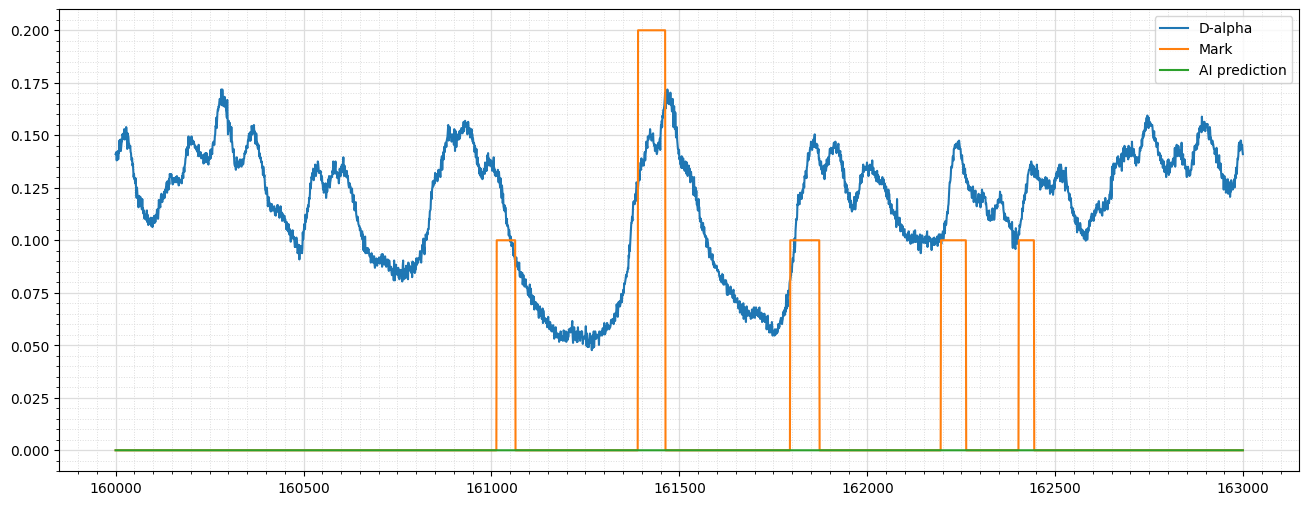

Input index pairs of ELM fragments (0.16 - 0.163 ms):
 161000 161500 162250 162500
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

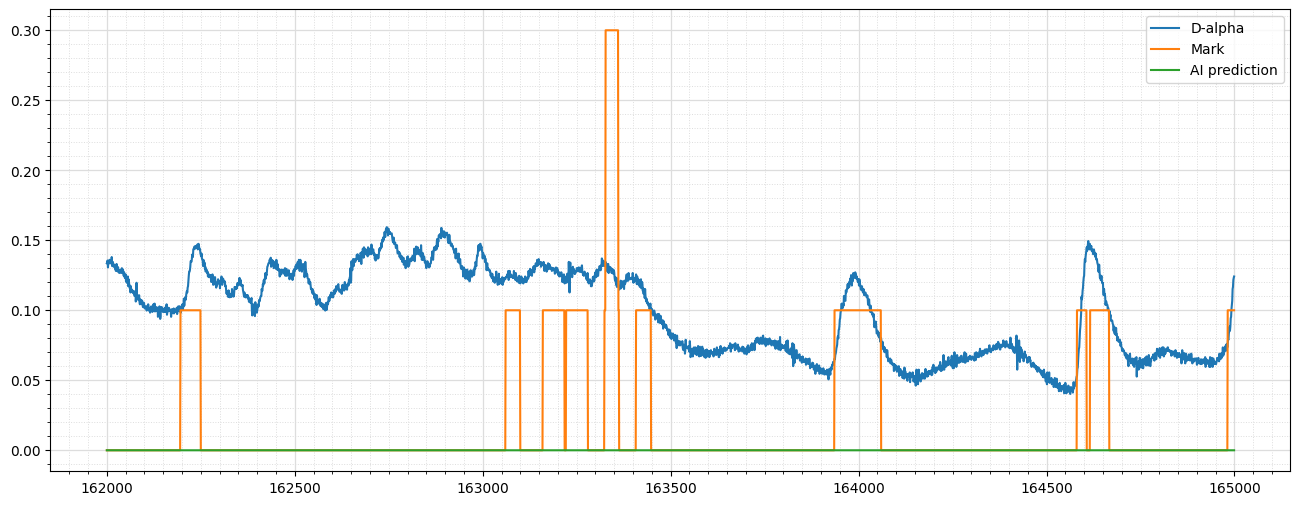

Input index pairs of ELM fragments (0.162 - 0.1649999999999999 ms):
 163000 164500 164500 164700
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

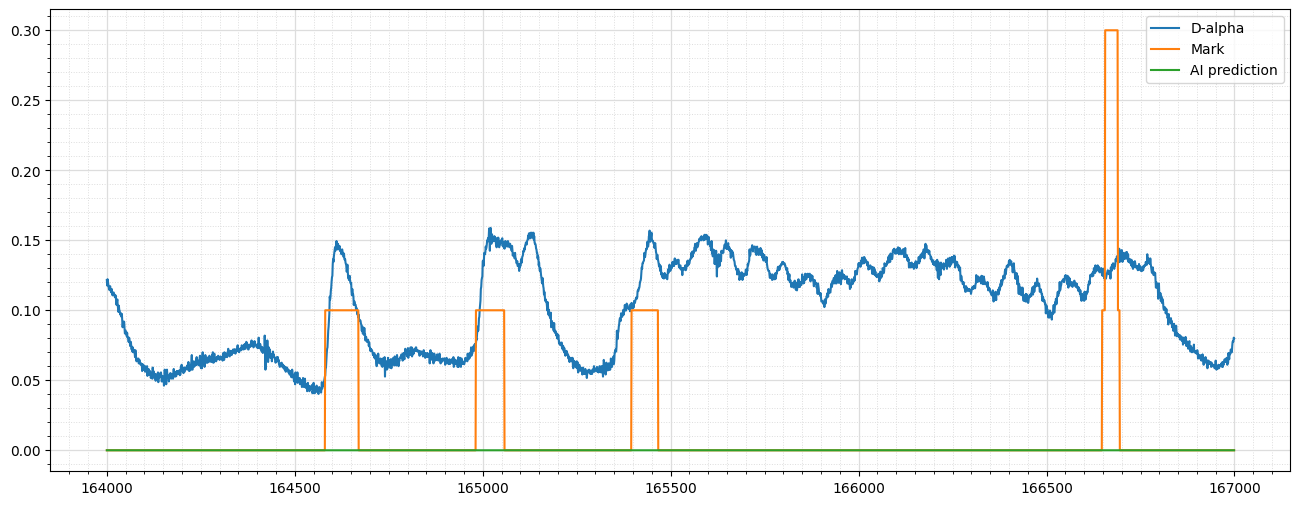

Input index pairs of ELM fragments (0.1639999999999999 - 0.1669999999999999 ms):
 166500 167000 
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

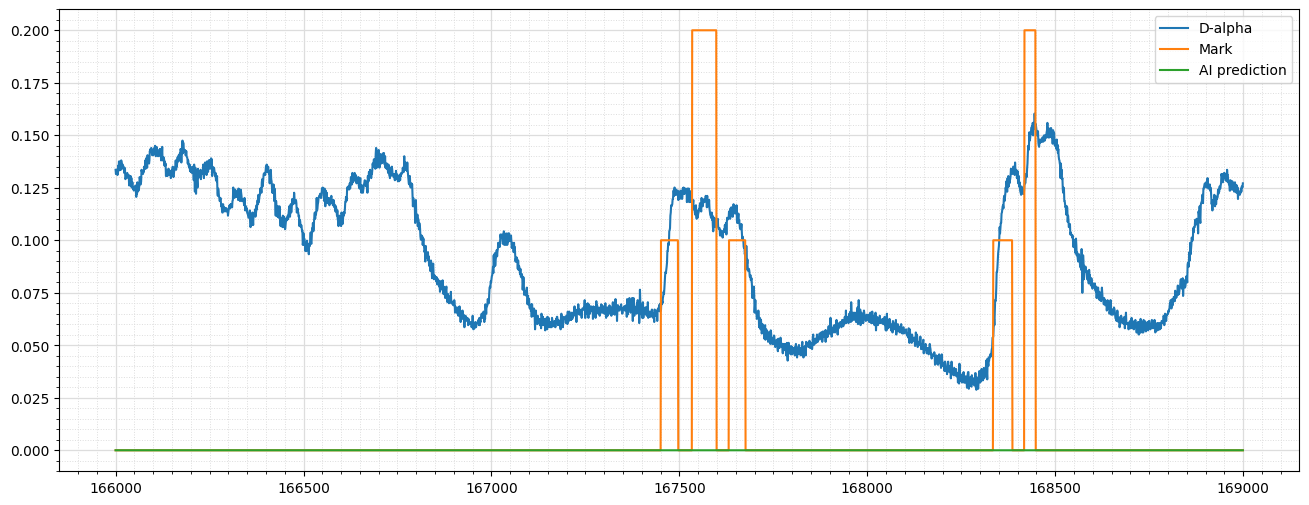

Input index pairs of ELM fragments (0.1659999999999999 - 0.1689999999999999 ms):
 167000 168500 167400 167550 168300 168550
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

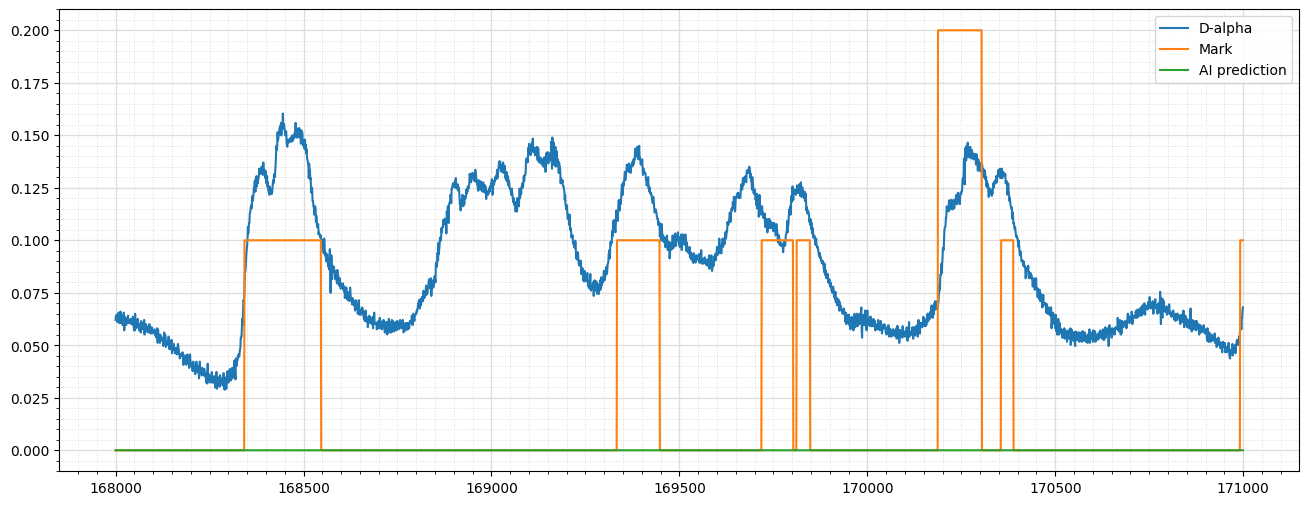

Input index pairs of ELM fragments (0.1679999999999999 - 0.1709999999999999 ms):
 169000 170500 170150 170400
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

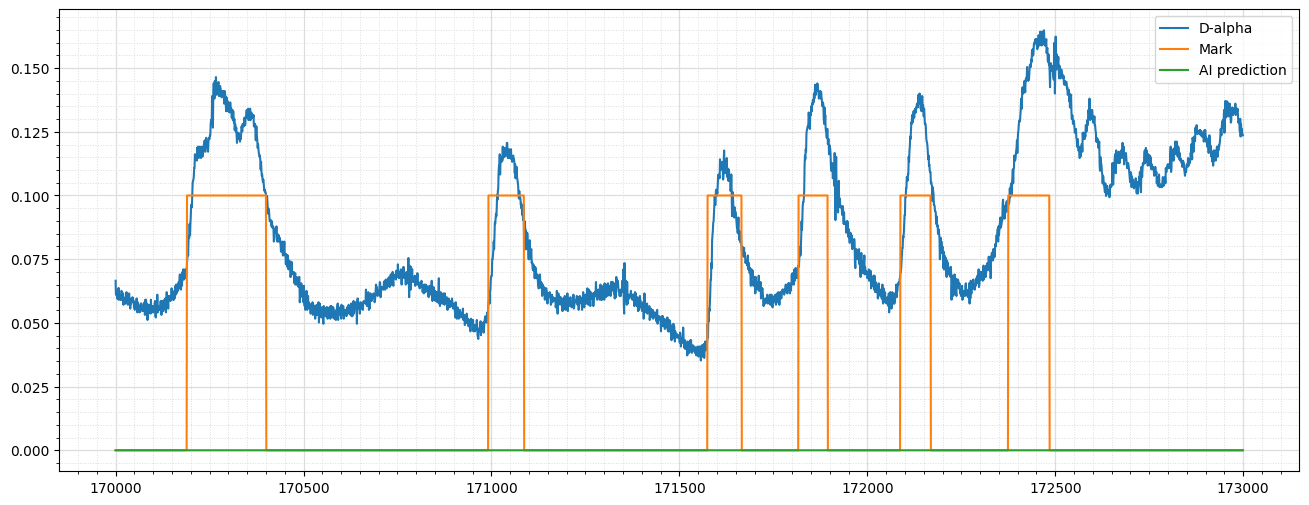

Input index pairs of ELM fragments (0.1699999999999999 - 0.173 ms):
 170500 172500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

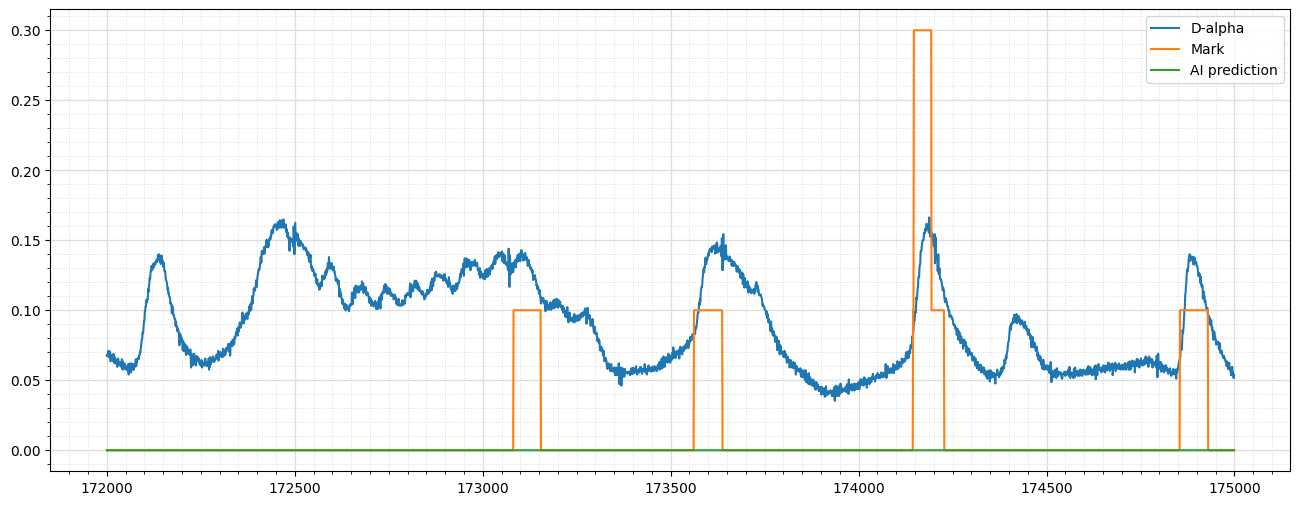

Input index pairs of ELM fragments (0.172 - 0.175 ms):
 173000 174500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

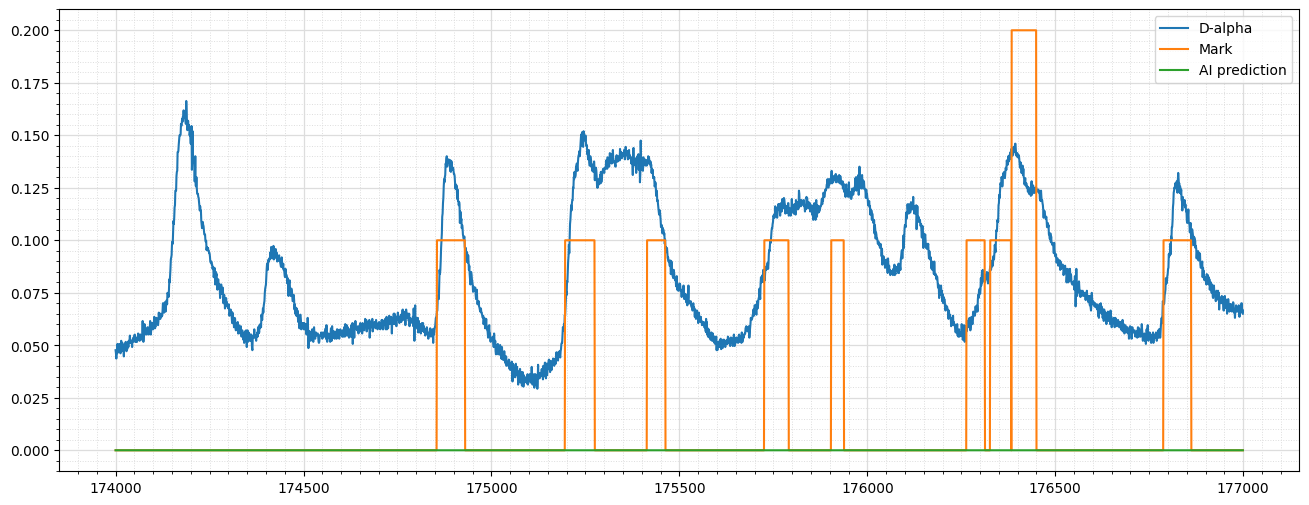

Input index pairs of ELM fragments (0.174 - 0.177 ms):
 175250 176500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

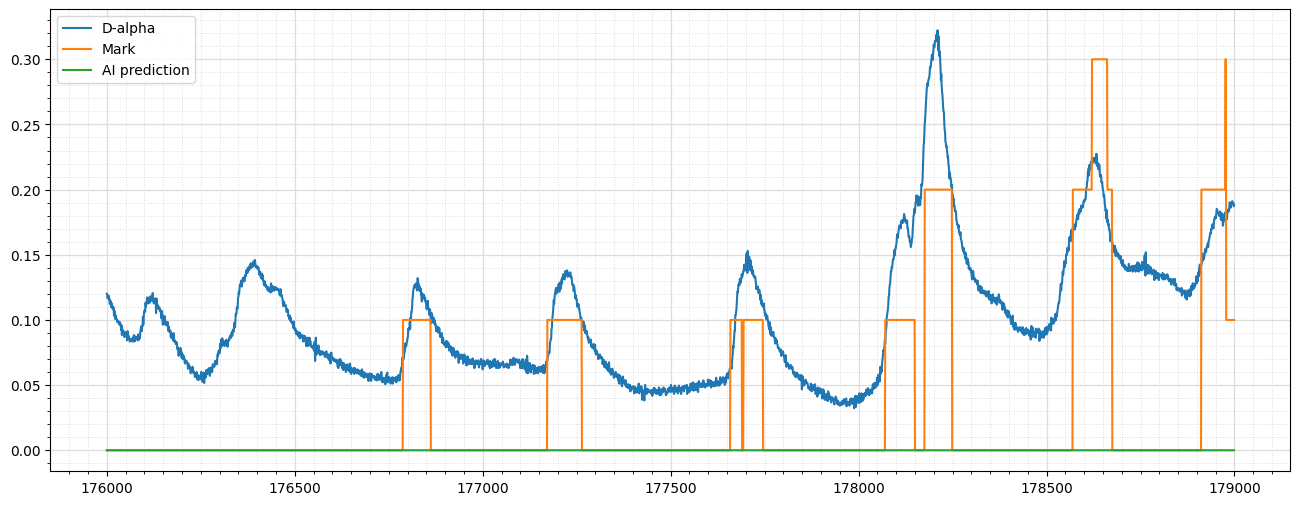

Input index pairs of ELM fragments (0.176 - 0.179 ms):
 177650 177750 178000 178500 178000 178300 178500 179000 
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

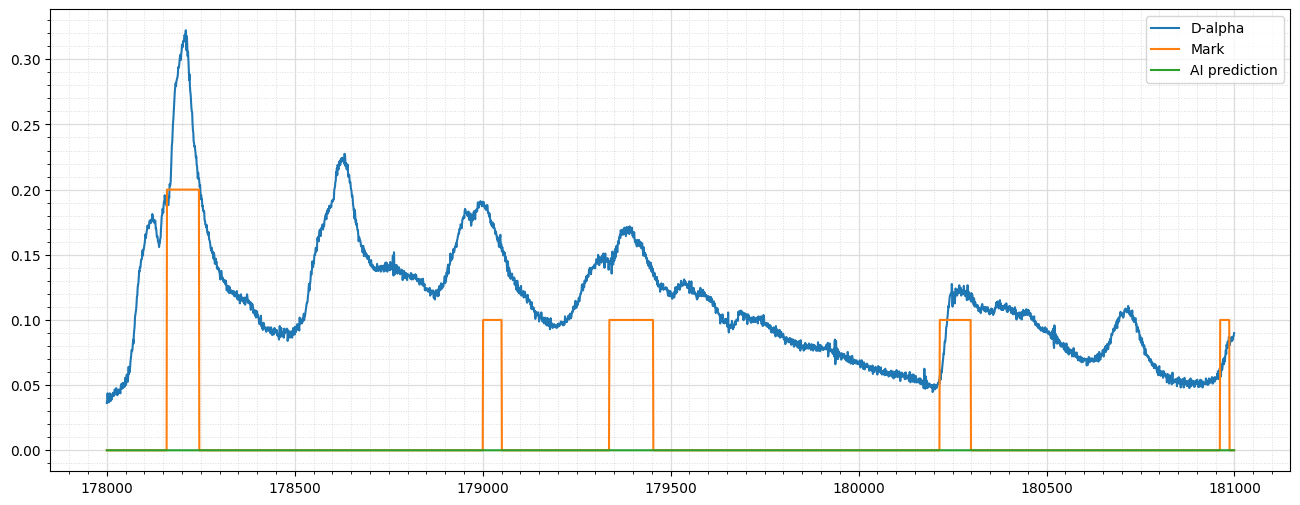

Input index pairs of ELM fragments (0.178 - 0.181 ms):
 179000 179500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

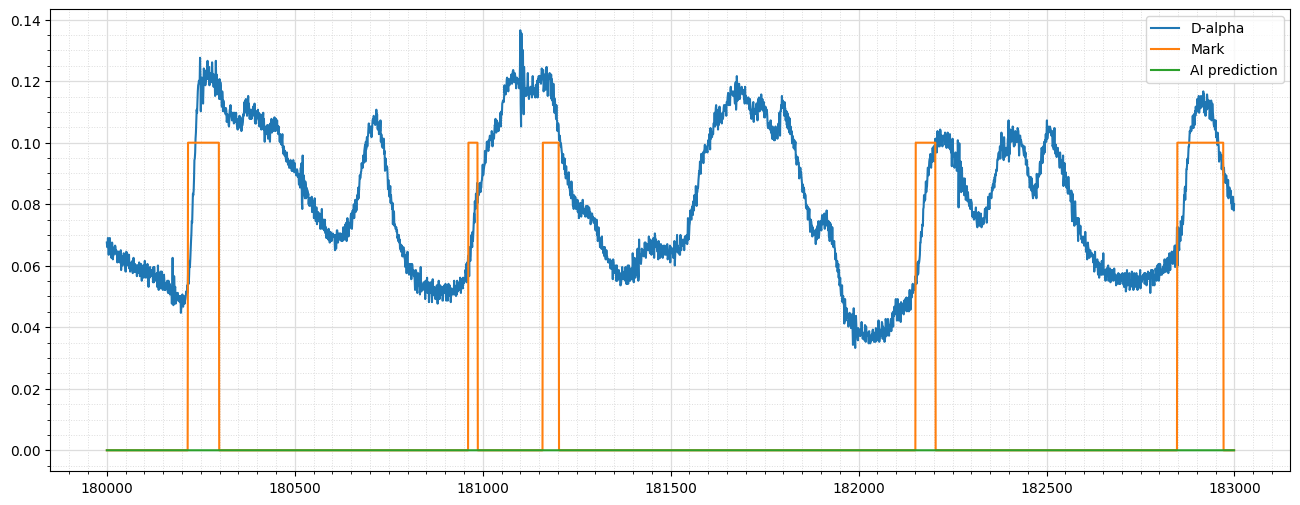

Input index pairs of ELM fragments (0.18 - 0.183 ms):
 180500 182500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

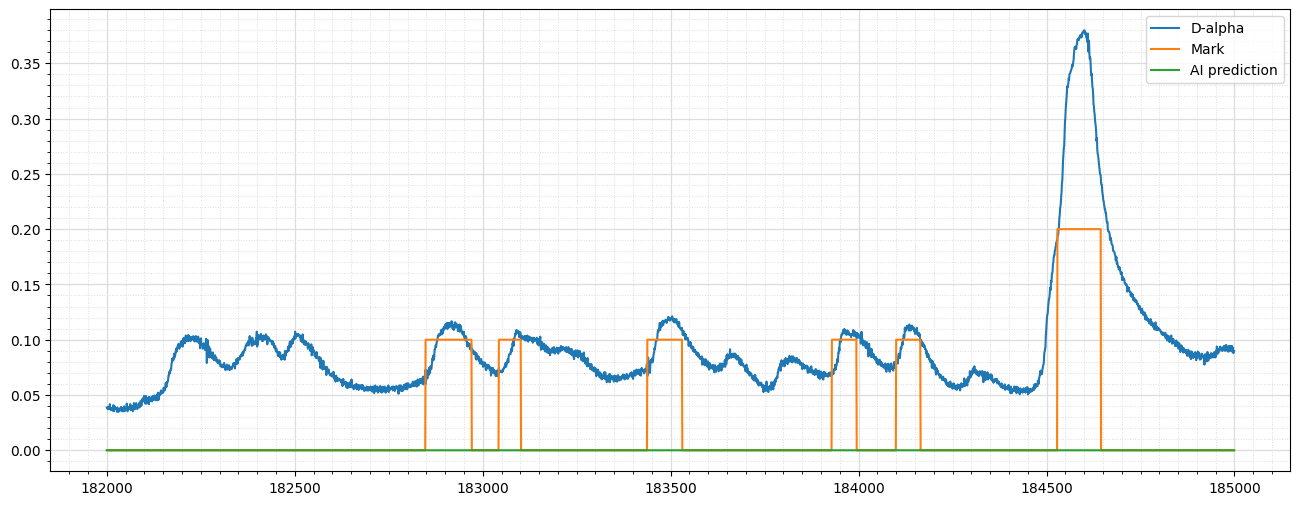

Input index pairs of ELM fragments (0.182 - 0.185 ms):
 182500 183550
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

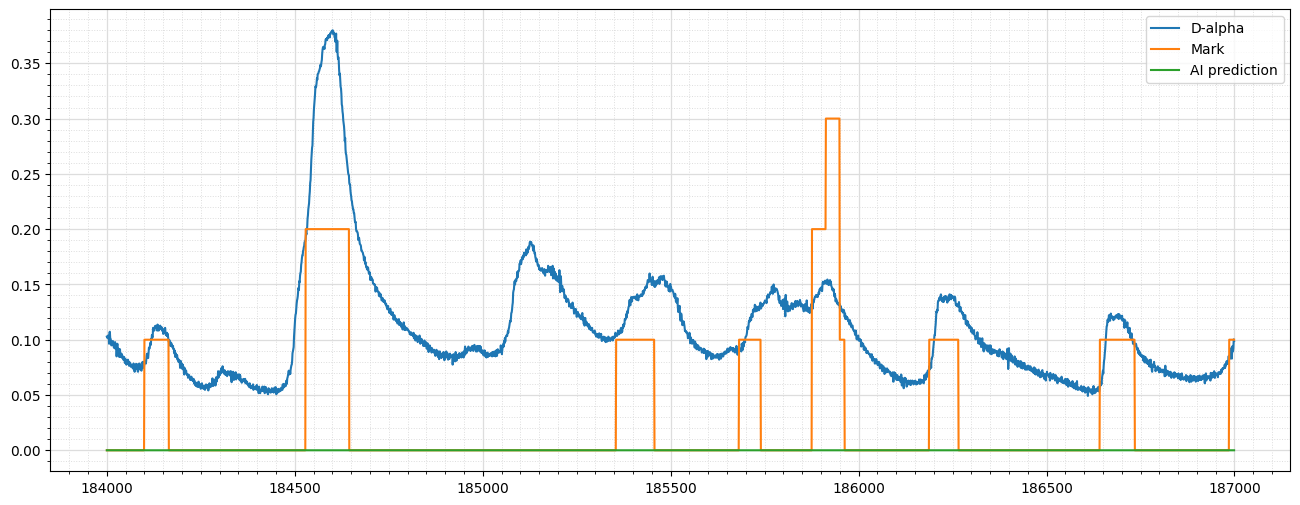

Input index pairs of ELM fragments (0.184 - 0.187 ms):
 185000 186000 185050 185150
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

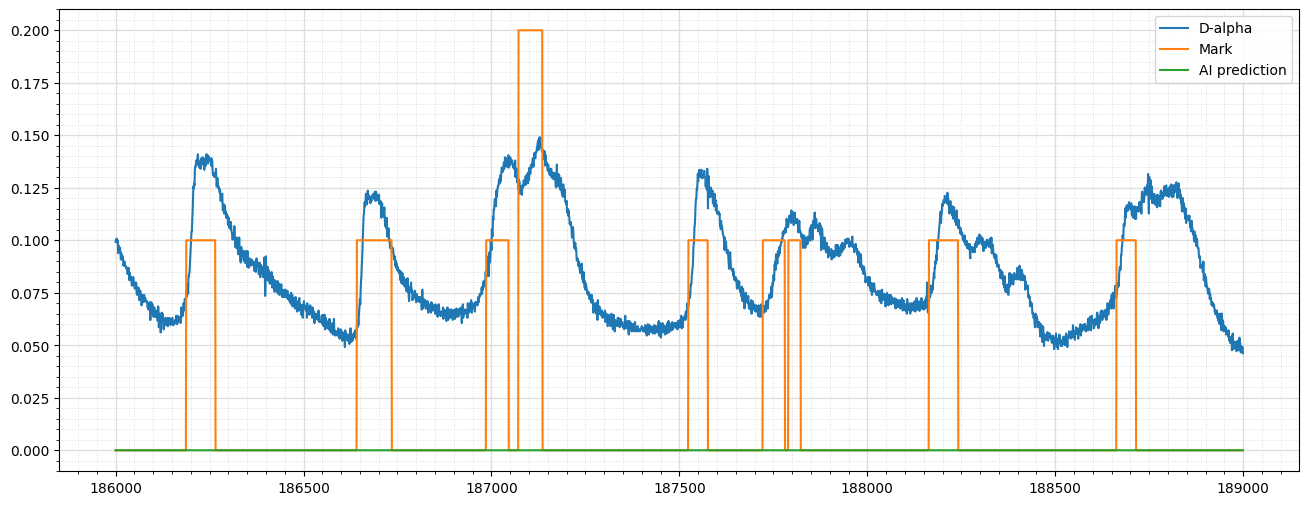

Input index pairs of ELM fragments (0.186 - 0.189 ms):
 186950 188000 187500 187650
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

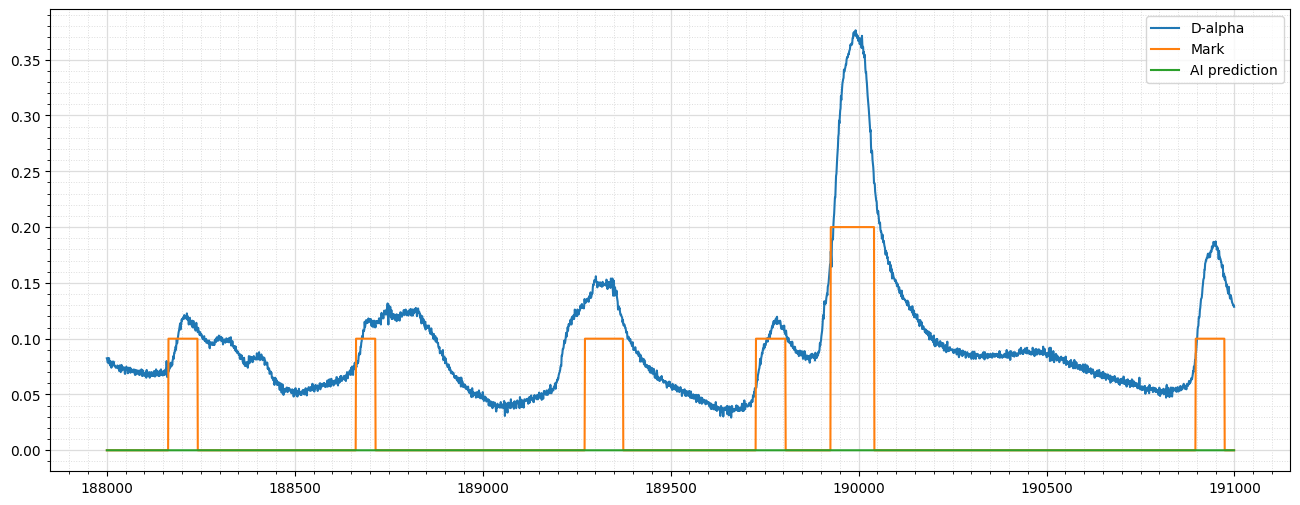

Input index pairs of ELM fragments (0.188 - 0.191 ms):
 189900 190050
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

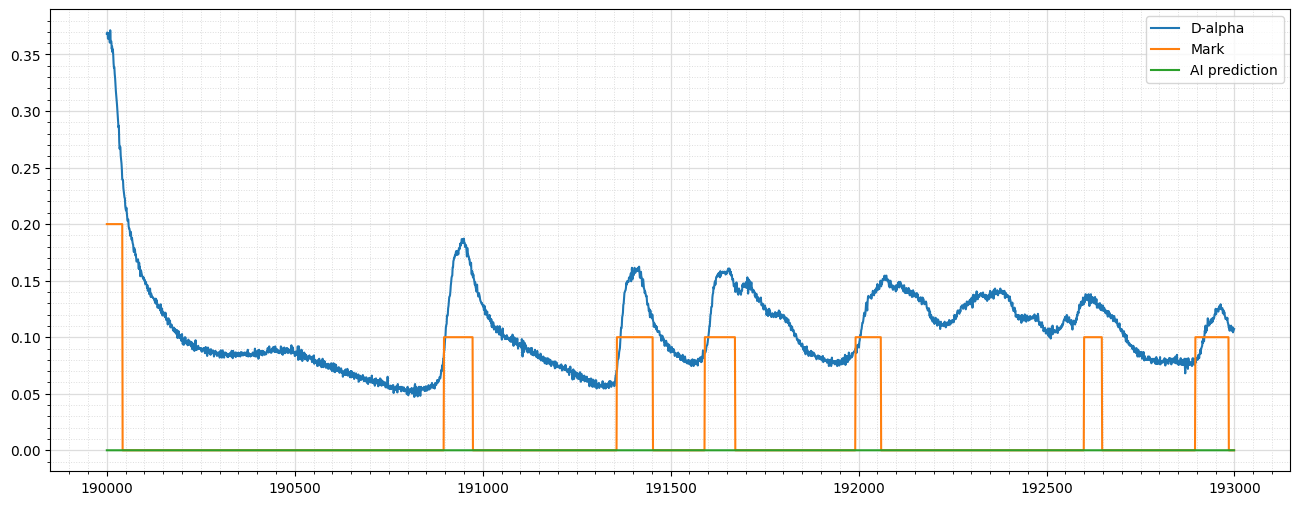

Input index pairs of ELM fragments (0.19 - 0.193 ms):
 191950 193000
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

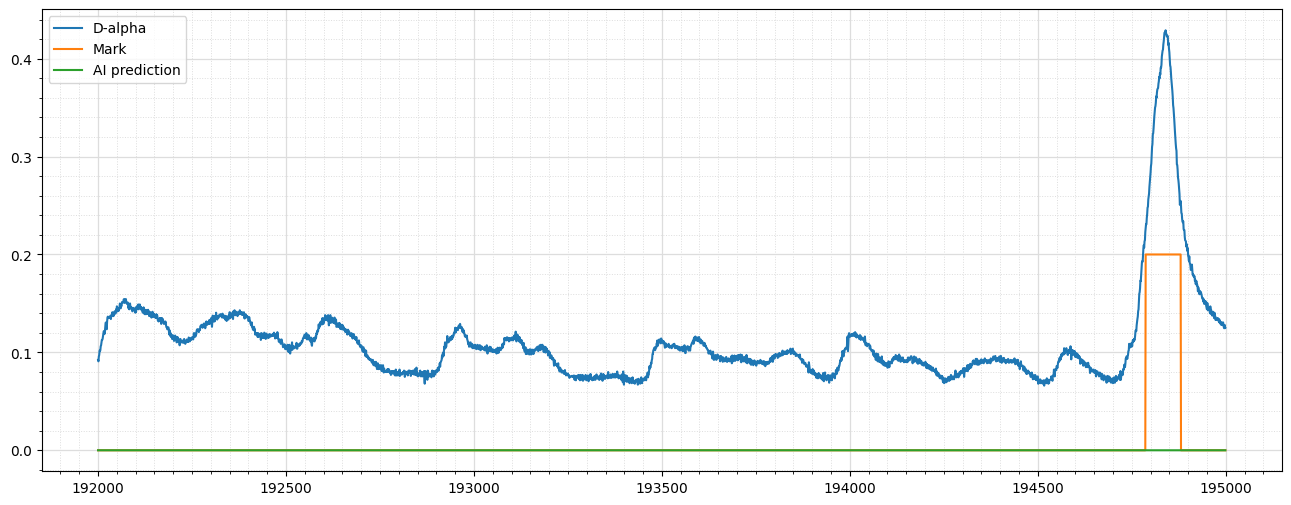

Input index pairs of ELM fragments (0.192 - 0.1949999999999999 ms):
 192900 193000 193450 193500 193950 194050 194525 194625
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

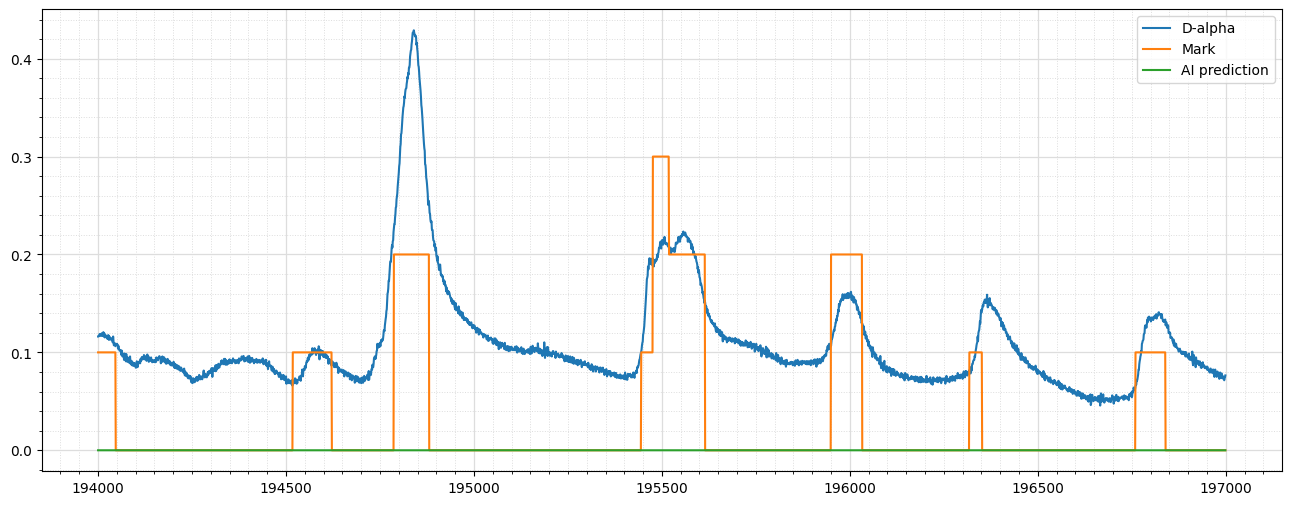

Input index pairs of ELM fragments (0.1939999999999999 - 0.1969999999999999 ms):
 195000 196500 195400 195600 196300 196425
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

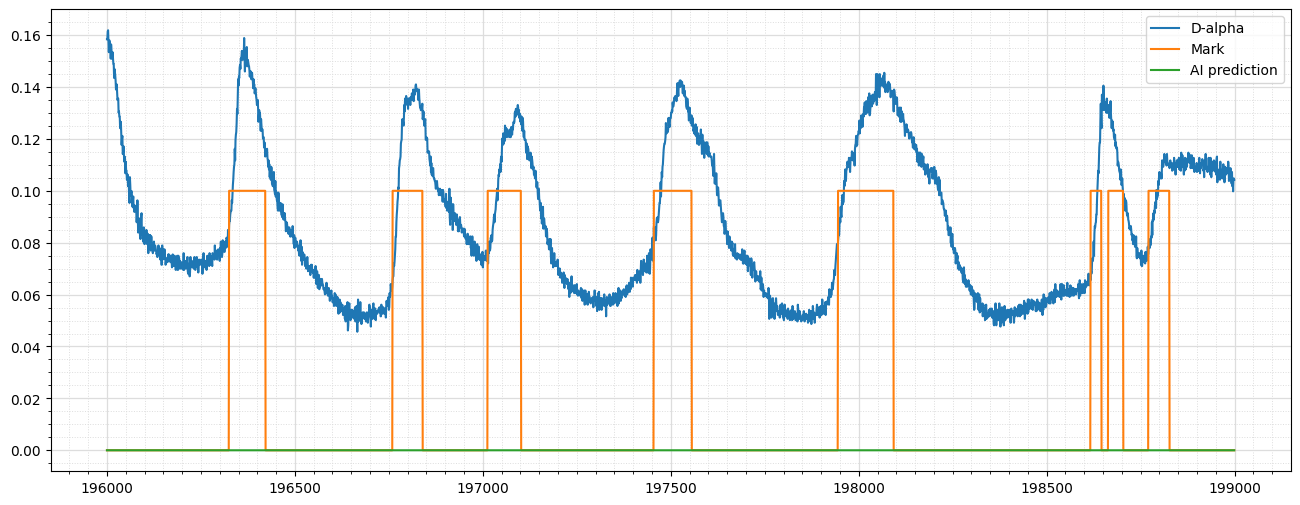

Input index pairs of ELM fragments (0.1959999999999999 - 0.1989999999999999 ms):
 197800 199000 198600 198700
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

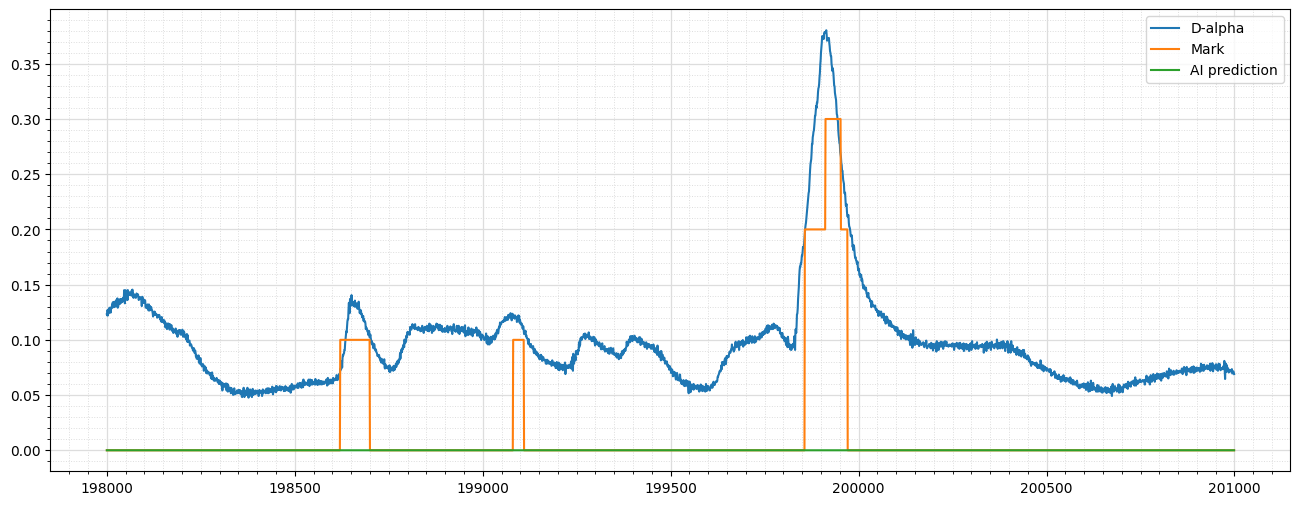

Input index pairs of ELM fragments (0.1979999999999999 - 0.2009999999999999 ms):
 199000 200000 199650 200000
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

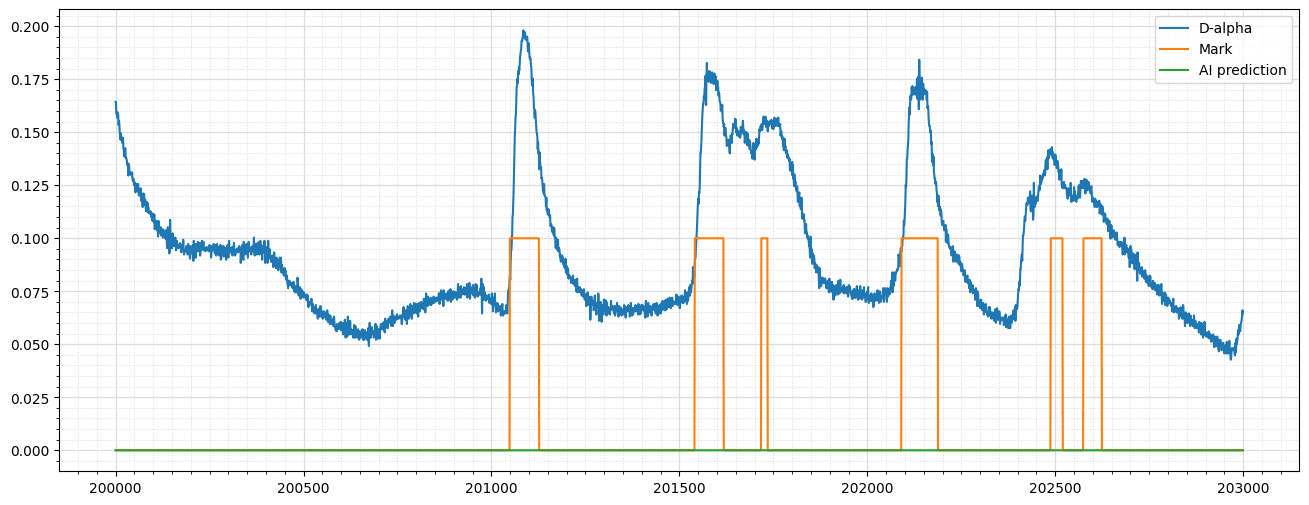

Input index pairs of ELM fragments (0.1999999999999999 - 0.2029999999999999 ms):
 201700 201750 202400 203000 202350 202550
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

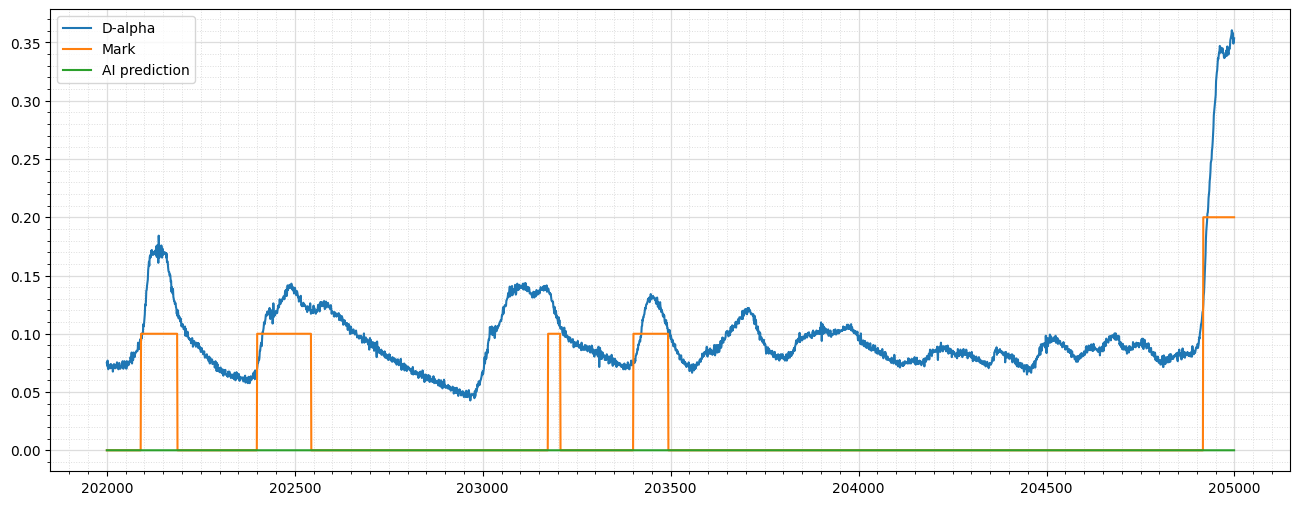

Input index pairs of ELM fragments (0.2019999999999999 - 0.205 ms):
 203000 203250
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

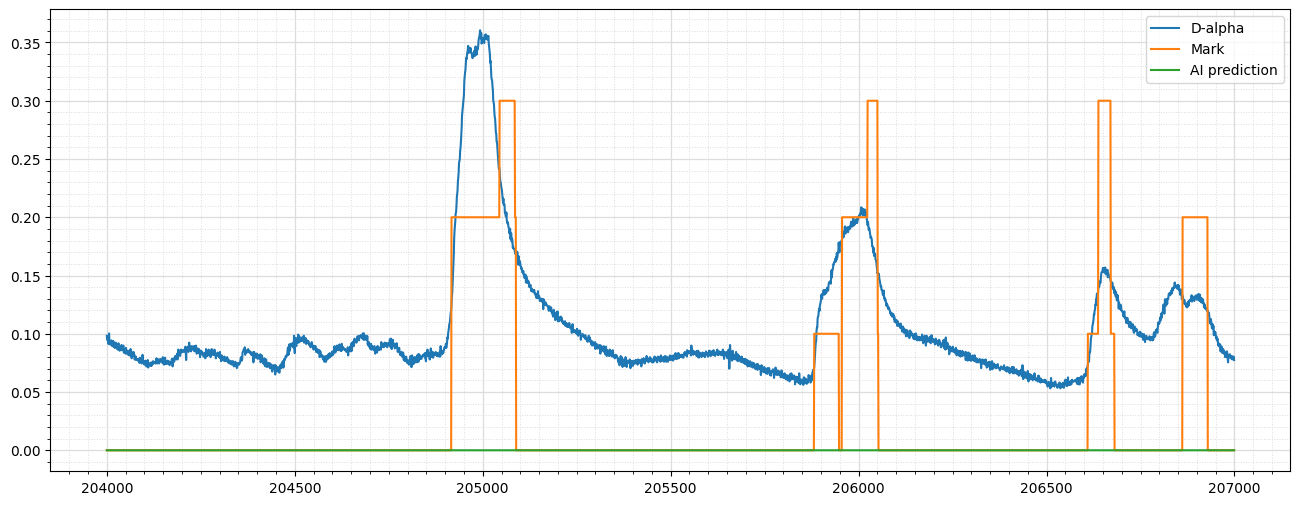

Input index pairs of ELM fragments (0.204 - 0.207 ms):
 204850 205100 204850 205100 205500 207000 206600 206700
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

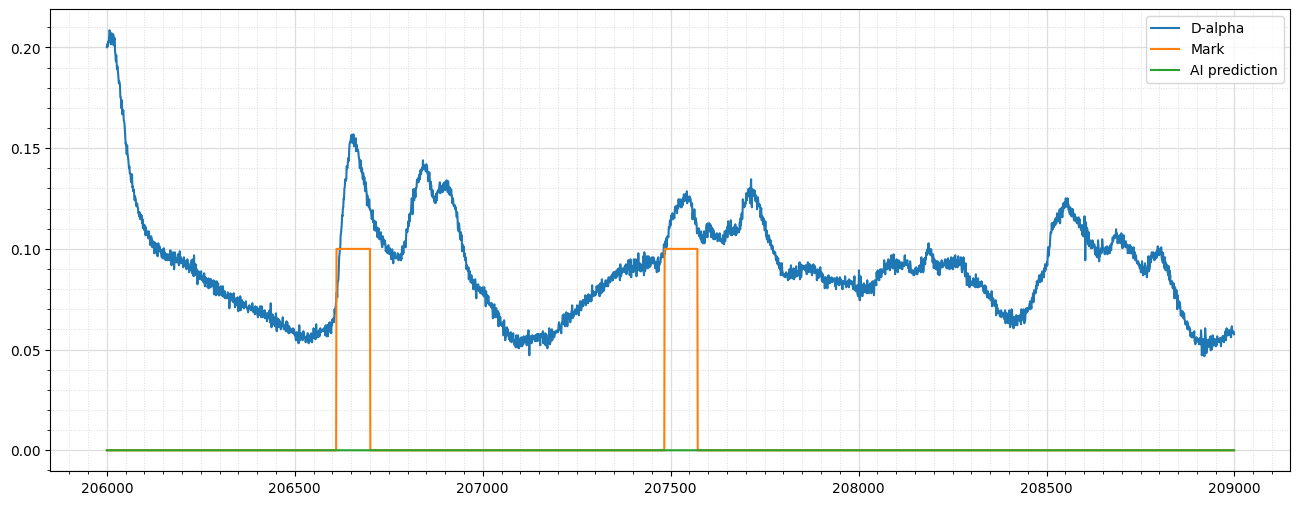

Input index pairs of ELM fragments (0.206 - 0.209 ms):
 207000 208000
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

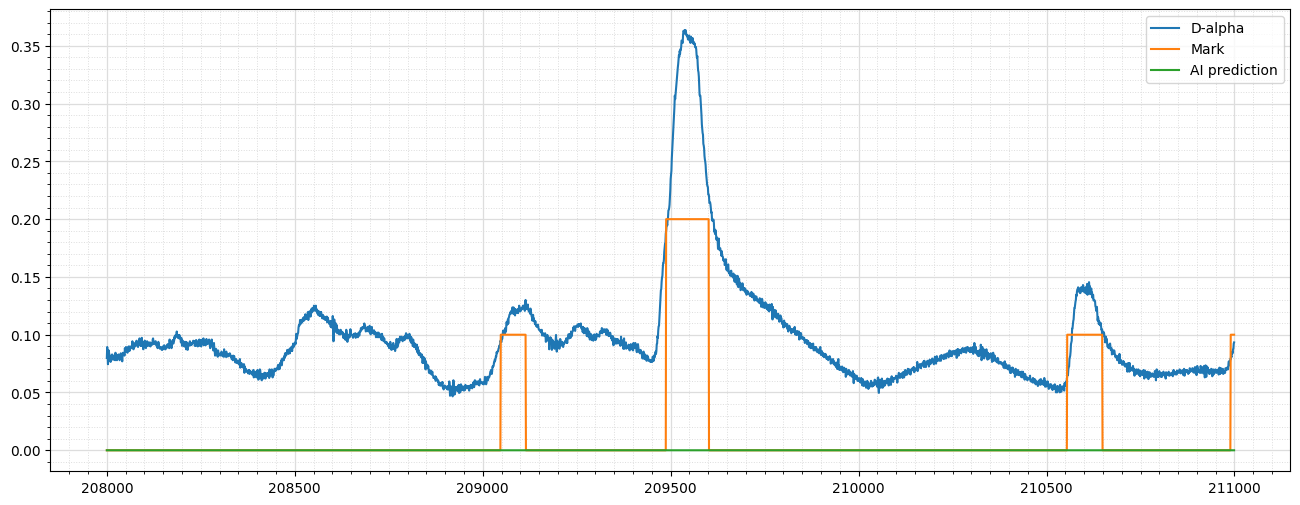

Input index pairs of ELM fragments (0.208 - 0.211 ms):
 209000 209150
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

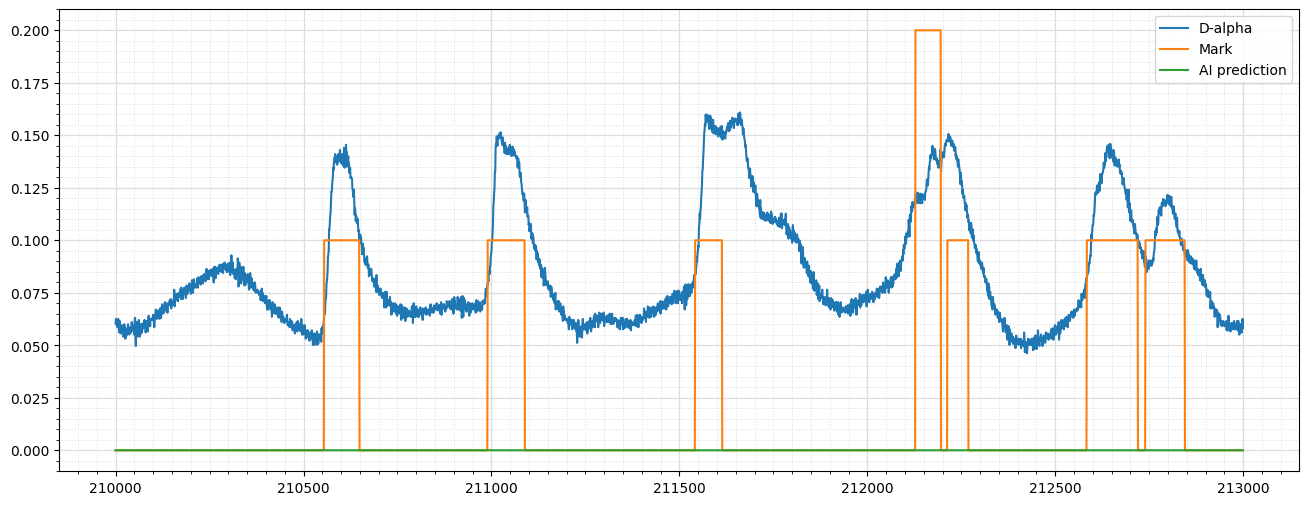

Input index pairs of ELM fragments (0.21 - 0.213 ms):
 212000 212500
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

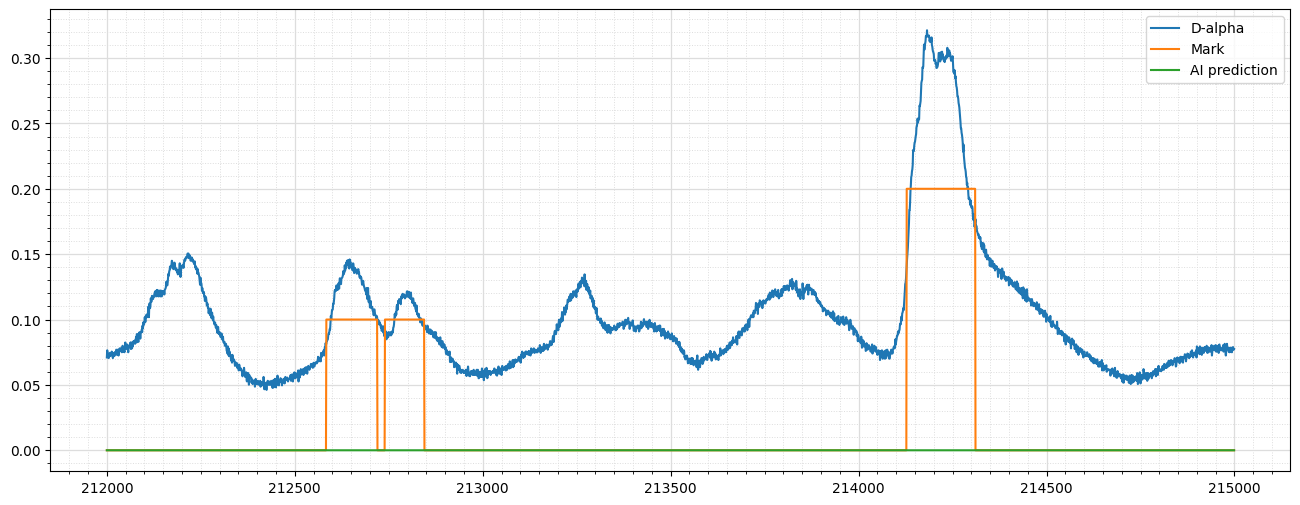

Input index pairs of ELM fragments (0.212 - 0.215 ms):
 


<Figure size 640x480 with 0 Axes>

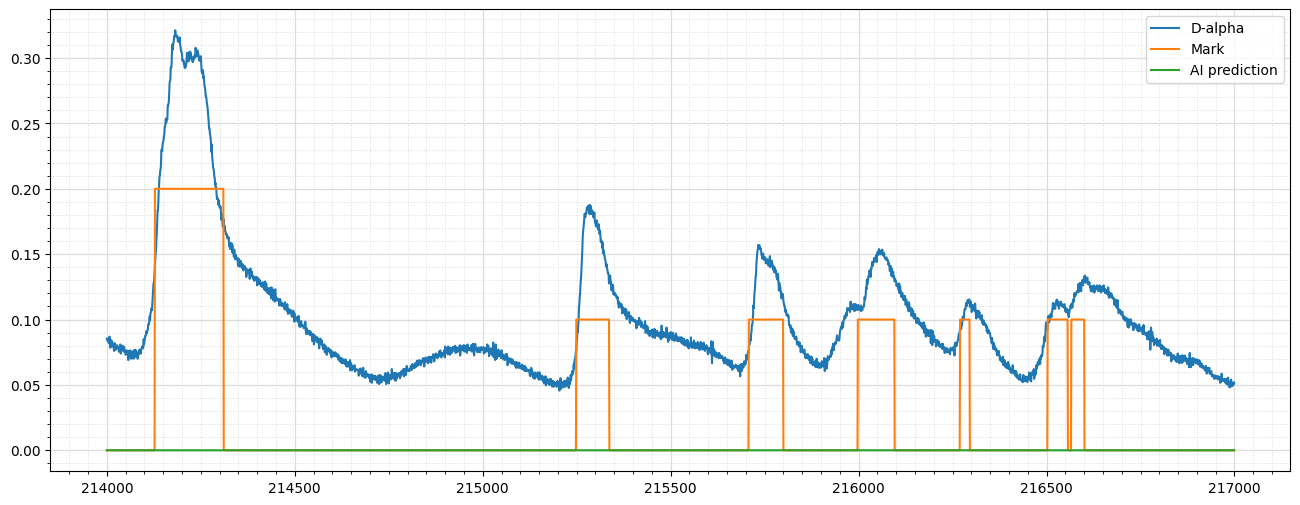

Input index pairs of ELM fragments (0.214 - 0.217 ms):
 216250 217000 216250 216350
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

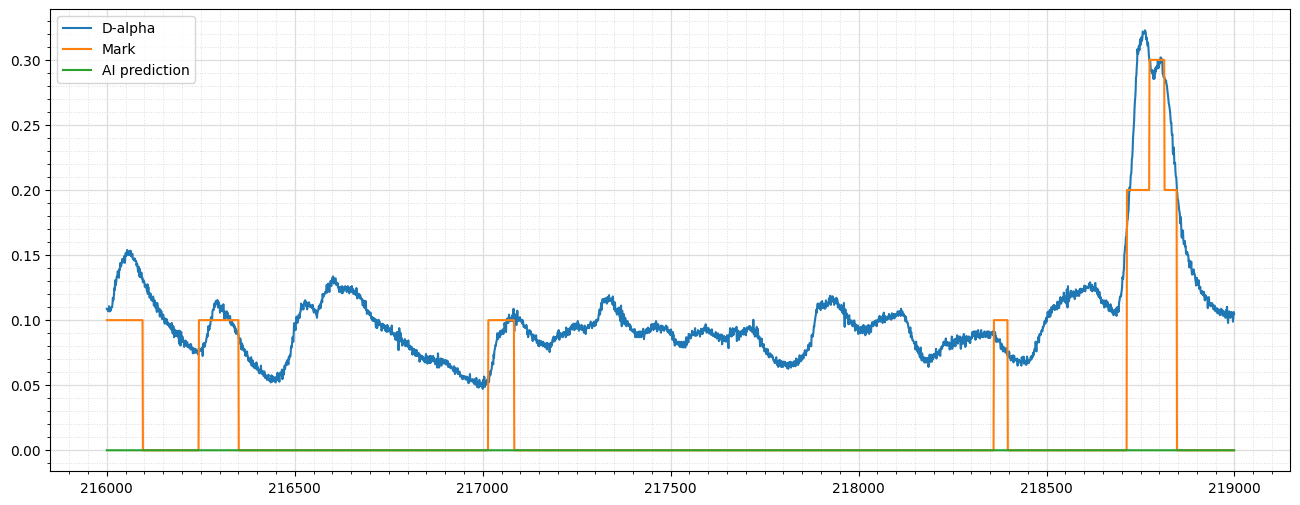

Input index pairs of ELM fragments (0.216 - 0.219 ms):
 218000 219000 218650 218850
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

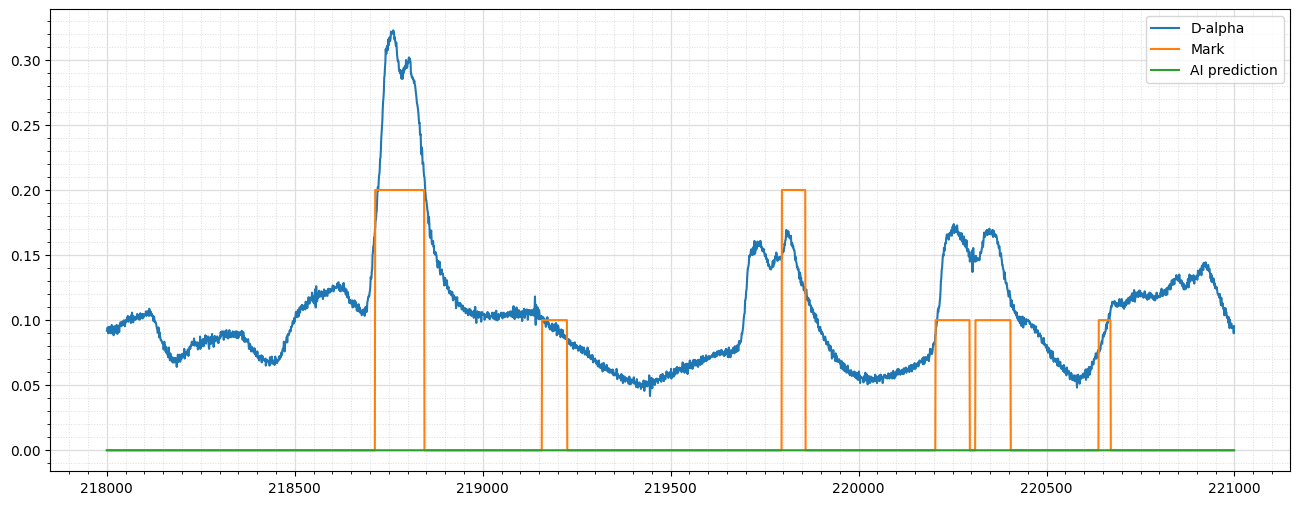

Input index pairs of ELM fragments (0.218 - 0.221 ms):
 219000 220000 219650 219775 220500 221000
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

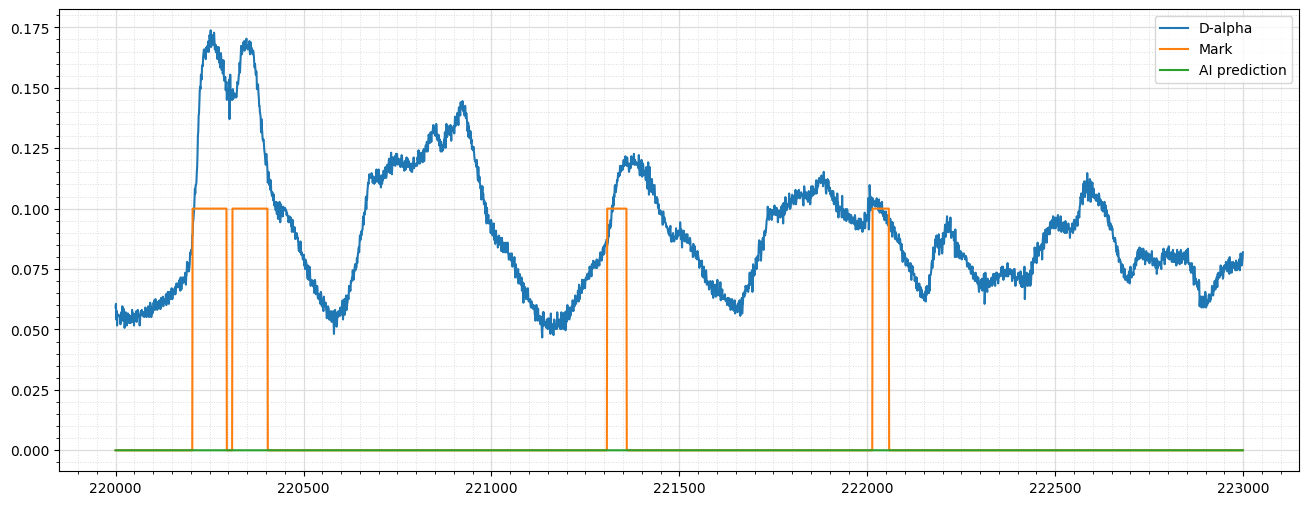

Input index pairs of ELM fragments (0.22 - 0.223 ms):
 221000 222500 221300 221450
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

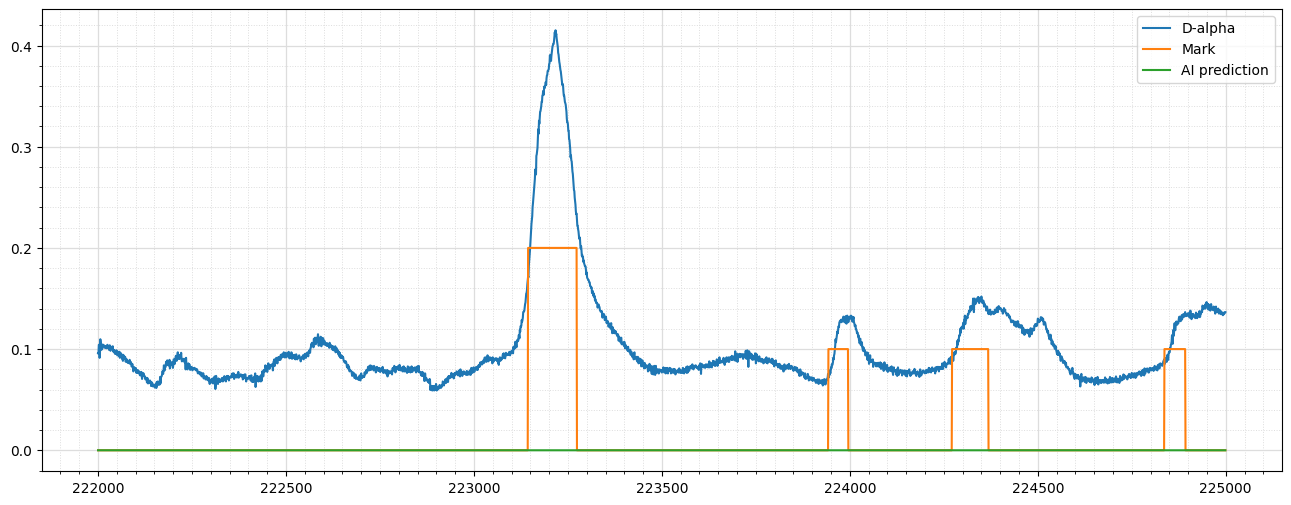

Input index pairs of ELM fragments (0.222 - 0.2249999999999999 ms):
 


<Figure size 640x480 with 0 Axes>

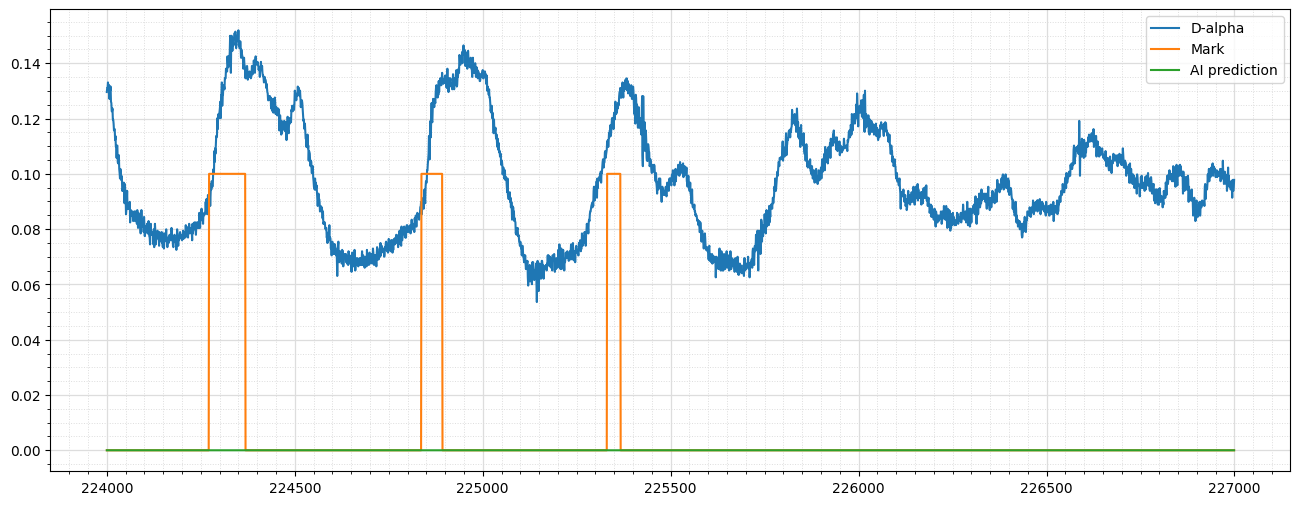

Input index pairs of ELM fragments (0.2239999999999999 - 0.2269999999999999 ms):
 224500 226000 224800 225050
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

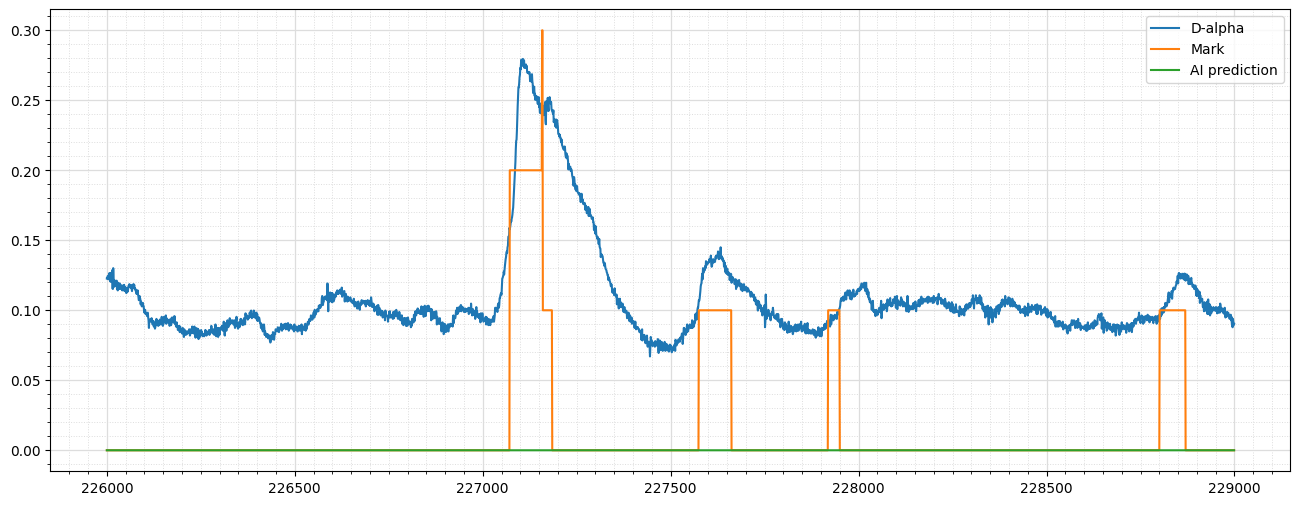

Input index pairs of ELM fragments (0.2259999999999999 - 0.2289999999999999 ms):
 227000 227500 227000 227250 227900 229000
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  0


<Figure size 640x480 with 0 Axes>

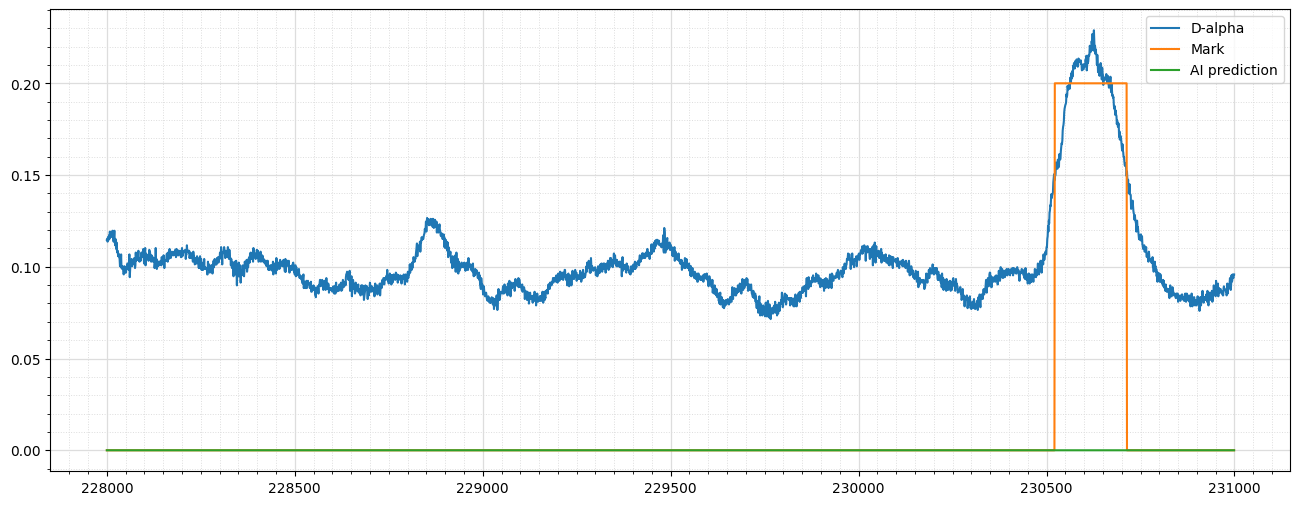

Input index pairs of ELM fragments (0.2279999999999999 - 0.2309999999999999 ms):
 


<Figure size 640x480 with 0 Axes>

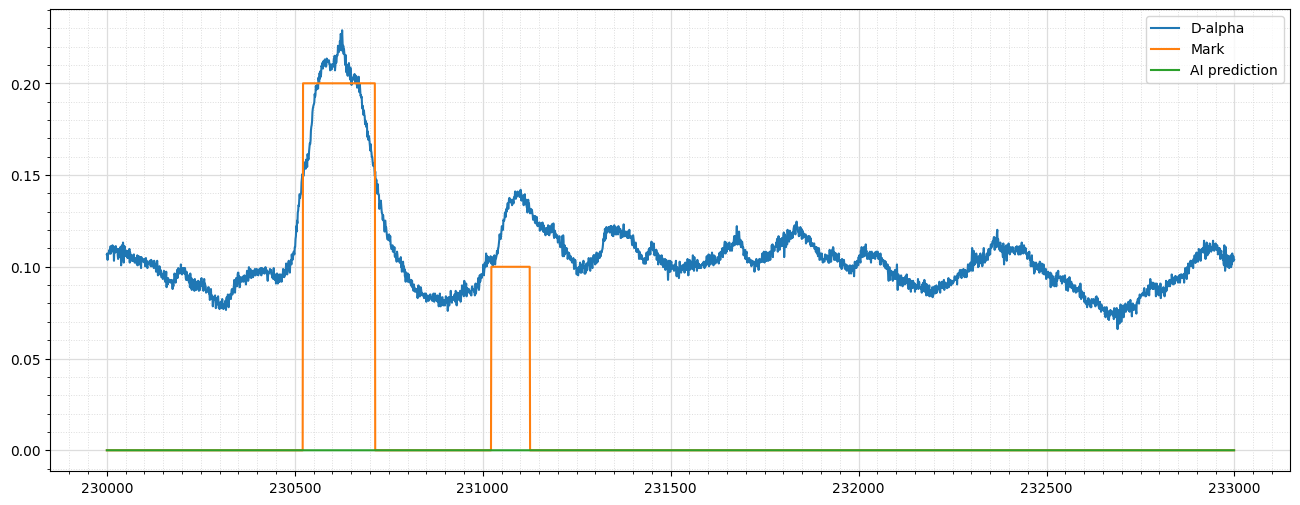

Input index pairs of ELM fragments (0.2299999999999999 - 0.2329999999999999 ms):
 231300 231400
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

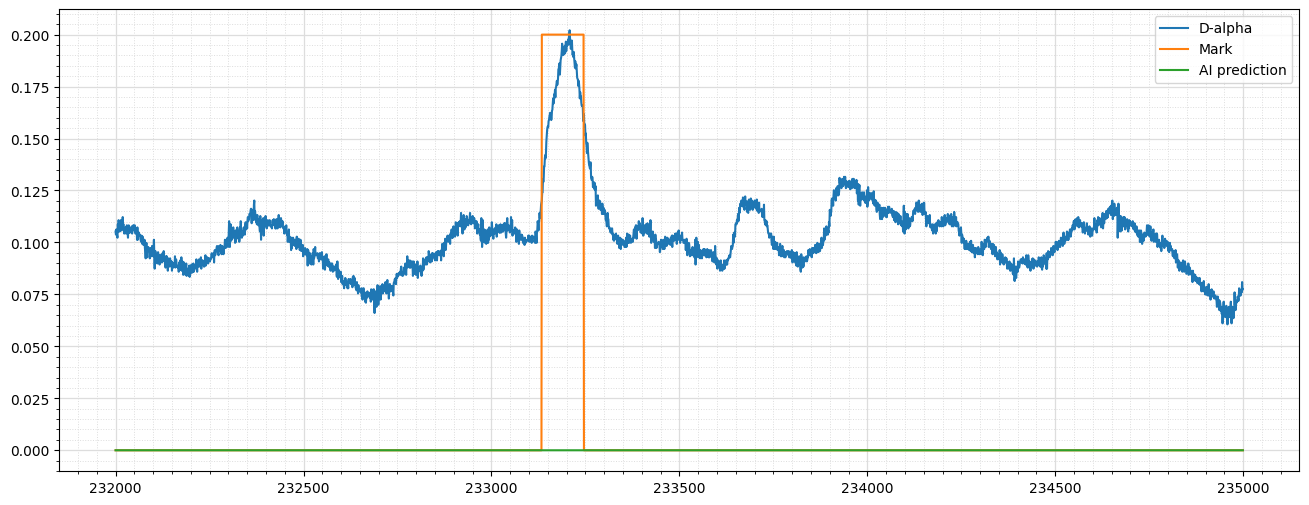

Input index pairs of ELM fragments (0.2319999999999999 - 0.235 ms):
 233600 233750 233850 234000 
Input mark to set [ 0 | 1 | 2 ]:  1
Input mark to set [ 0 | 1 | 2 ]:  1


<Figure size 640x480 with 0 Axes>

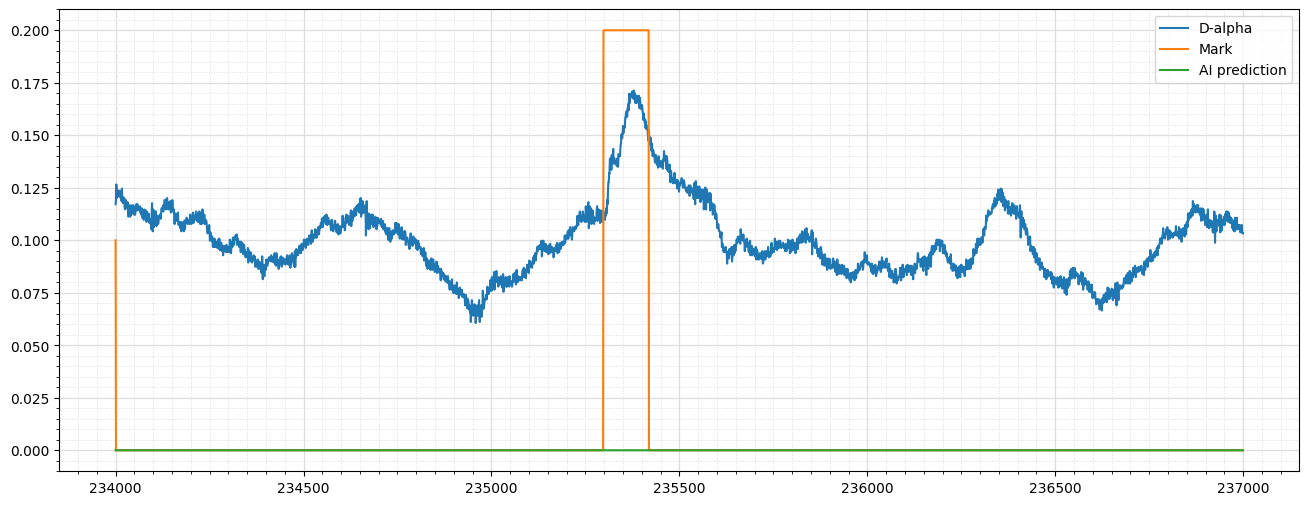

Input index pairs of ELM fragments (0.2339999999999999 - 0.237 ms):
 


<Figure size 640x480 with 0 Axes>

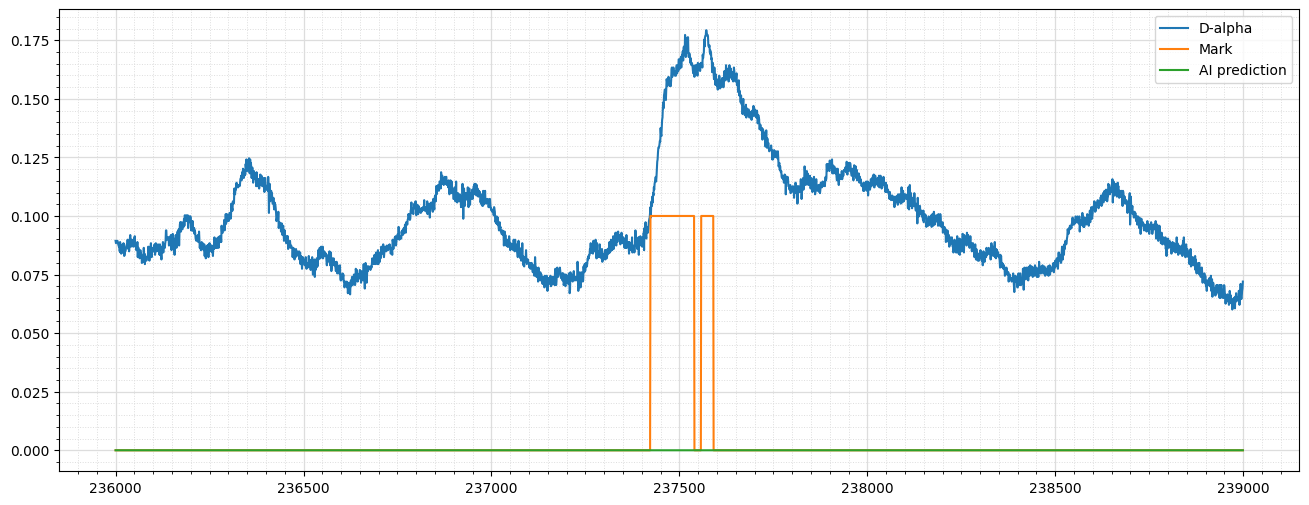

Input index pairs of ELM fragments (0.236 - 0.239 ms):
 237000 238000 237400 237700
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

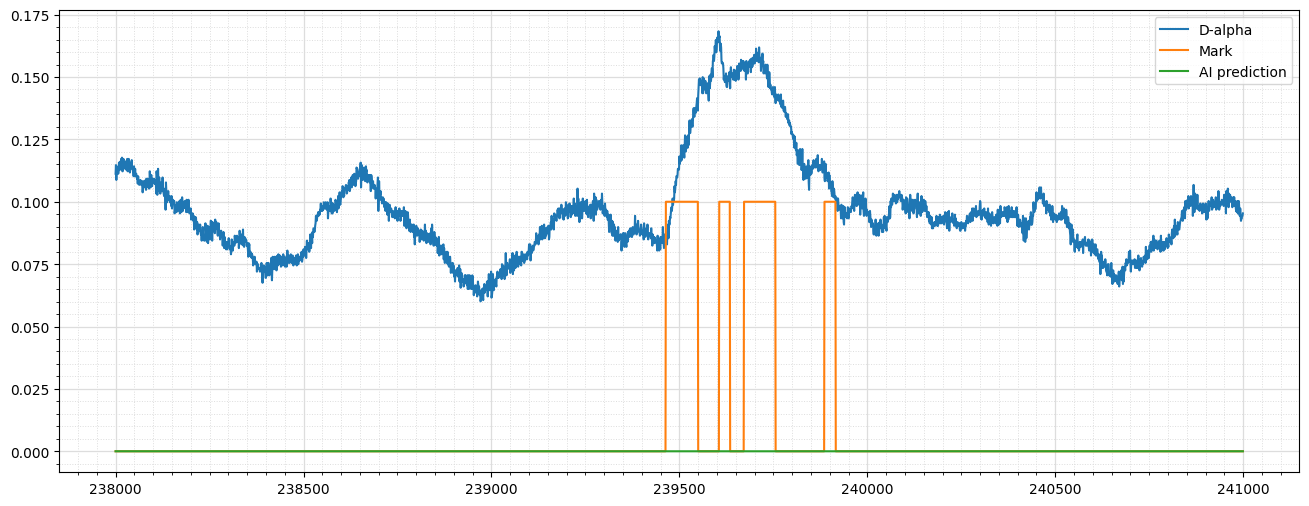

Input index pairs of ELM fragments (0.238 - 0.241 ms):
 239000 240000 239450 239900
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

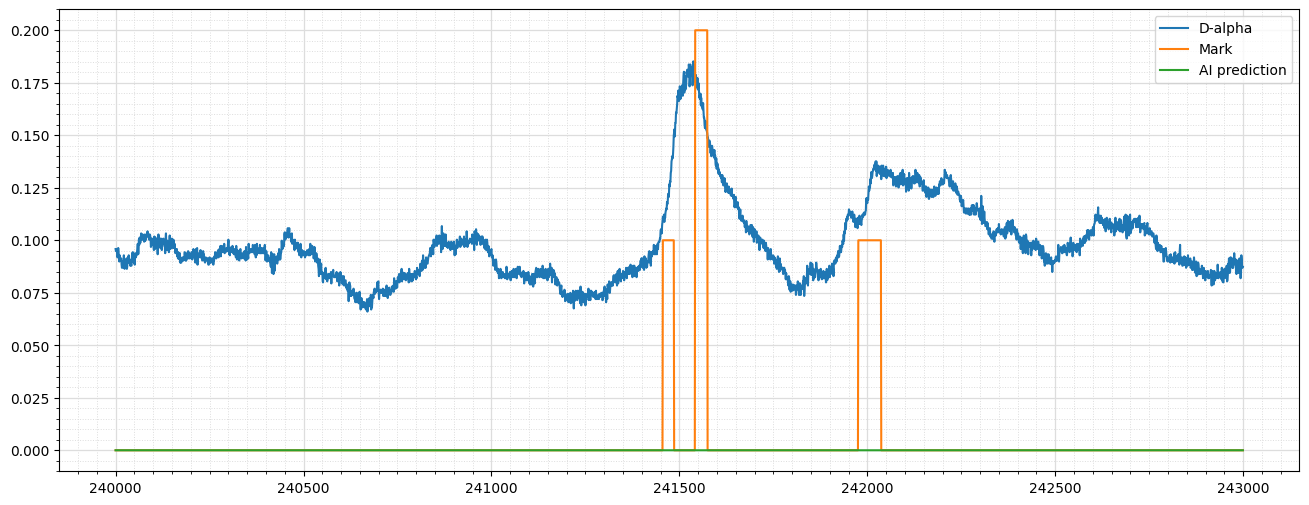

Input index pairs of ELM fragments (0.24 - 0.243 ms):
 241000 242500 241400 241600
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

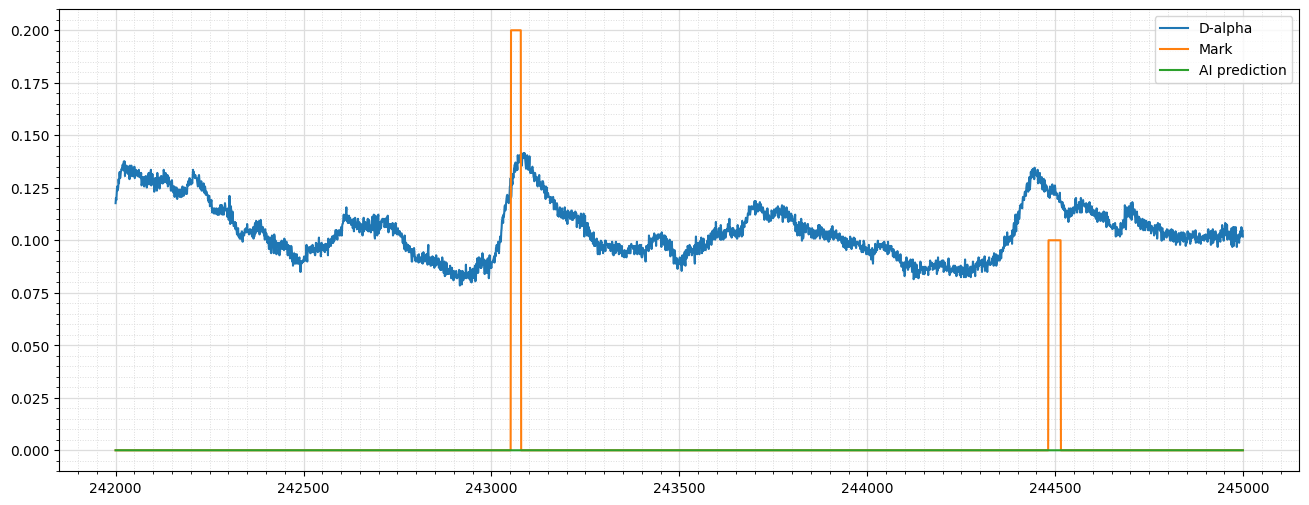

Input index pairs of ELM fragments (0.242 - 0.245 ms):
 242000 245000 243000 243150 244350 244650
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

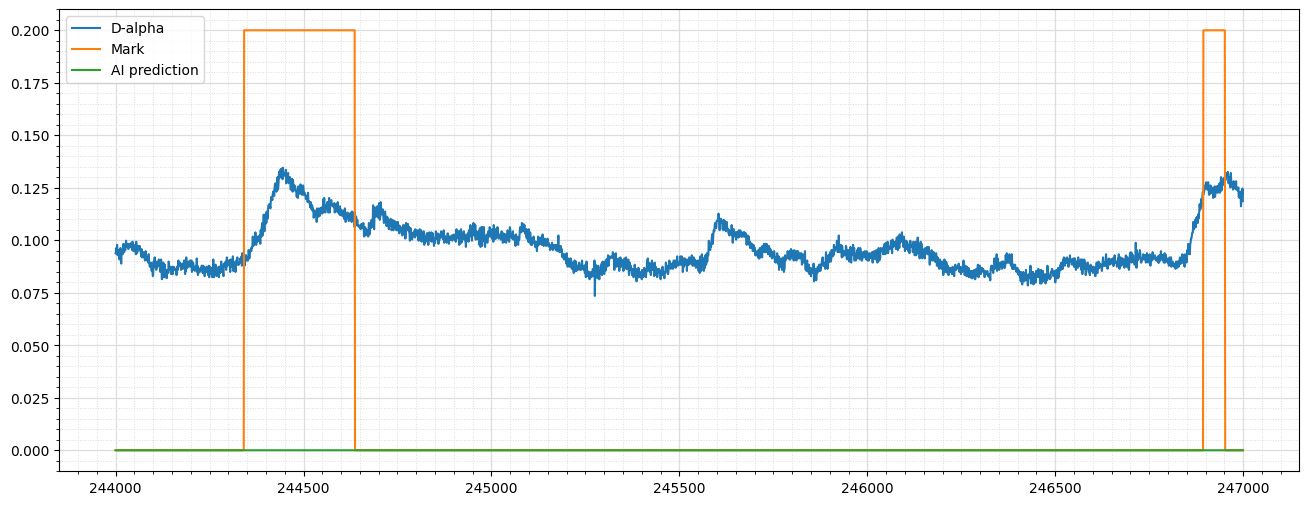

Input index pairs of ELM fragments (0.244 - 0.247 ms):
 


<Figure size 640x480 with 0 Axes>

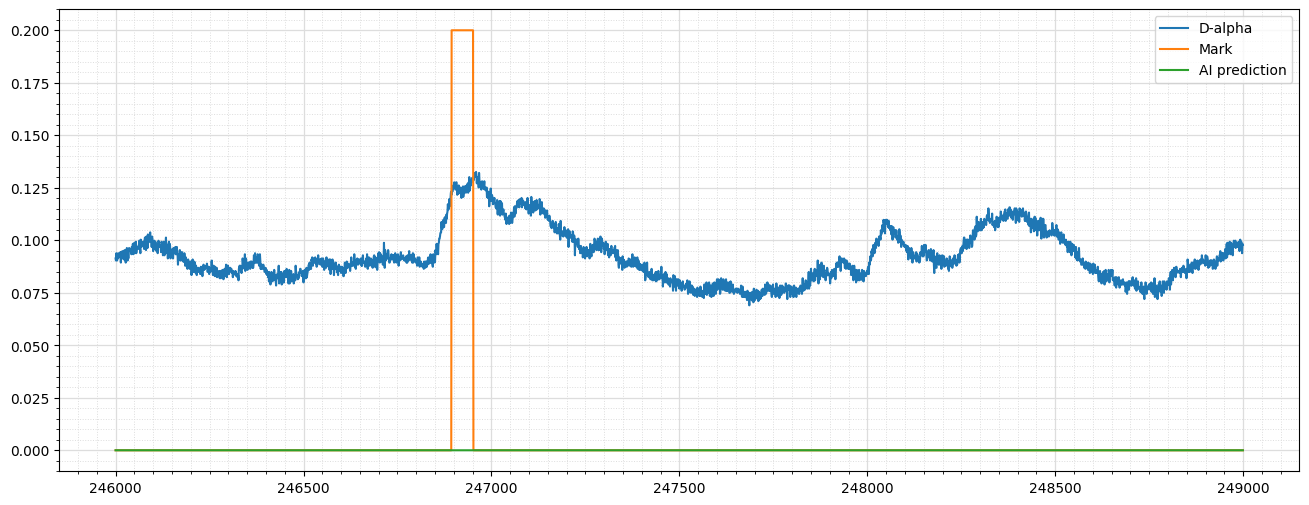

Input index pairs of ELM fragments (0.246 - 0.249 ms):
 245550 245700 246000 247000 246850 247050 248000 248150
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  0
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

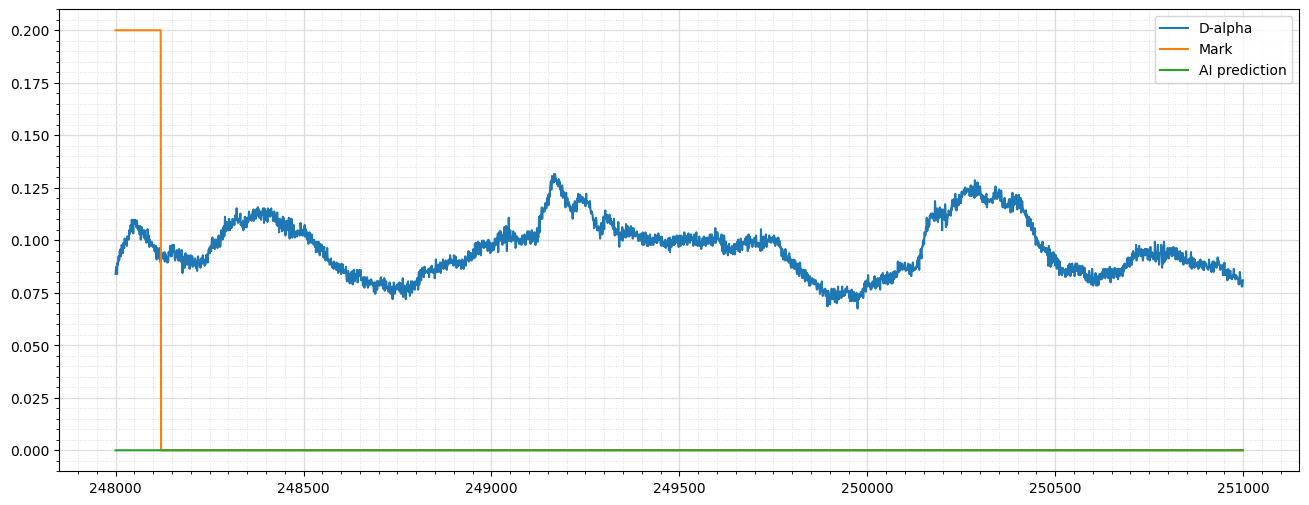

Input index pairs of ELM fragments (0.248 - 0.251 ms):
 245550 245700 249100 249300
Input mark to set [ 0 | 1 | 2 ]:  2
Input mark to set [ 0 | 1 | 2 ]:  2


<Figure size 640x480 with 0 Axes>

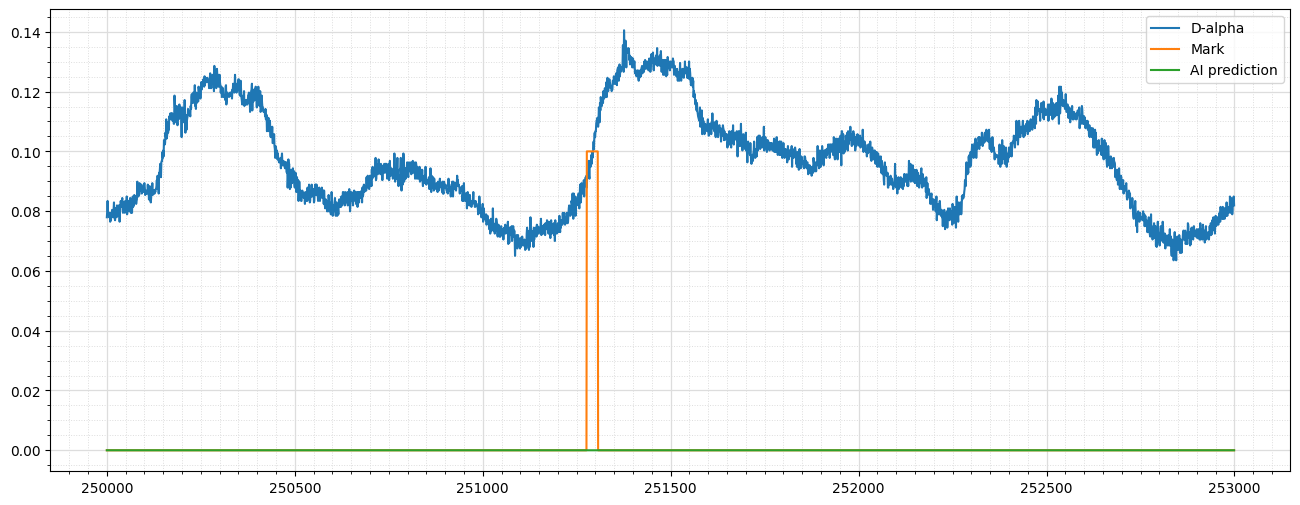

KeyboardInterrupt: Interrupted by user

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

mode_ploting = int(input("Input visualising mode [ 0 - manual | 1 - only marked ]:"))
mode_marking = int(input("Input marking mode (0 - manual | 1 - semiauto): ").strip().split()[0])
l_edge = int(input(f"Input start index [0:{df.shape[0]//1000*1000}]: ").strip().split()[0])
# print("---")
step = 2000
width = 3000

step_away = 10

while l_edge < df.shape[0]:
    r_edge = min(l_edge + width, df.shape[0] - 1)
    
    if mode_ploting == 1 and sum(df.ch1_marked[l_edge:r_edge]) == 0:
        l_edge += step
        continue
    
    fig, ax = plt.subplots()

    fig.set_figwidth(16)
    fig.set_figheight(6)

    ax.plot(range(l_edge, r_edge), normalise_series(df.ch1)[l_edge:r_edge], label="D-alpha")
    ax.plot(range(l_edge, r_edge), df.ch1_marked[l_edge:r_edge] * 0.1, label="Mark")
    ax.plot(range(l_edge, r_edge), df.ch1_ai_marked[l_edge:r_edge] * 0.1, label="AI prediction")

    ax.grid(which='major', color='#DDDDDD', linewidth=0.9)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.7)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.legend()
    plt.show()

    res = list(map(int, input(f"Input index pairs of ELM fragments ({df.t[l_edge]} - {df.t[r_edge]} ms):\n").strip().split()))
    for i in range(0, len(res), 2):
        board_ind = [res[i], res[i+1]]

        mark = float(input("Input mark to set [ 0 | 1 | 2 ]: "))
        
        if mode_marking and mark > 0:
            board_ind = get_borders(df.loc[res[i]:res[i + 1], "ch1"].to_numpy(), scale=1.5)
            board_ind[0] = max(board_ind[0] - step_away + res[i], 0)
            board_ind[1] += res[i]
        
        df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = mark

    plt.close()
    plt.clf()
    l_edge += step

# 217500

In [4]:
df.to_csv(interval_path + f"df/{F_ID}_full_data.csv", index=False)  # _full
df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000       393216.0
mean        0.196607       0.261072       0.035342            0.0
std         0.113512       0.345136       0.230457            0.0
min         0.000000      -0.245391       0.000000            0.0
25%         0.098304       0.015337       0.000000            0.0
50%         0.196607       0.074128       0.000000            0.0
75%         0.294911       0.521455       0.000000            0.0
max         0.393215       4.902700       2.000000            0.0

In [5]:
count = 0
np_marked = df.ch1_marked.to_numpy()
for i in range(df.shape[0]-1):
    if np_marked[i] == 0 and np_marked[i+1] != 0:
        count += 1
print(count)

91


# Fragments info


1. 44173 - [ -- | 64 | 21 ]
2. 44173 - [ 91 | -- | -- ] (full)
3. 44183 - [ -- | 59 | 17 ]
4. 44184 - [ 57 | -- | -- ]
5. 44194 - [ 87 | -- | -- ]
6. 44350 - [ -- | 58 | 26 ]
7. 44351 - [ -- | 44 | 21 ]

---
## AI marking
---

In [4]:
from source.NN_environment import get_prediction_unet

df["ch1_ai_marked"] = get_prediction_unet(df["ch1"].to_numpy(), ckpt_v=2)  # , old=True
df.to_csv(interval_path + f"df/{F_ID}_data.csv", index=False)
df.describe()

D:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


t           ch1  ch1_marked  ch1_ai_marked
count  76243.000000  76243.000000     76243.0   7.624300e+04
mean     203.119000      0.529203         0.0   1.001058e-01
std       22.009603      0.160735         0.0   2.752408e-01
min      164.998000      0.181490         0.0   2.584950e-17
25%      184.058500      0.396200         0.0   9.571570e-08
50%      203.119000      0.526570         0.0   6.554467e-06
75%      222.179500      0.639040         0.0   1.165128e-03
max      241.240000      1.265300         0.0   1.000000e+00

---
## Export to SHT
---

In [10]:
F_ID = 44351

df =  pd.read_csv(f"data/intervals/df/{F_ID}_data.csv", sep=",")
df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000   3.932160e+05
mean        0.196607       0.183800       0.003525   1.388237e-02
std         0.113512       0.276314       0.059265   1.087089e-01
min         0.000000      -0.539348       0.000000   0.000000e+00
25%         0.098304       0.015337       0.000000   2.042218e-31
50%         0.196607       0.048567       0.000000   6.961260e-20
75%         0.294911       0.350193       0.000000   2.173595e-12
max         0.393215       4.889919       1.000000   1.000000e+00

In [12]:
import shtReader_py.shtRipper as shtRipper

to_pack = {
    "D-alpha, chord=50 cm": {
        'comment': f'SHOT: #{F_ID}',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1.to_list()
    },
    "Mark": {
        'comment': 'ELMs marks (by Belous F.; 09.08.2024)',  # Belous F. | proc-sys v2.0-0scl
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_marked.to_list()
    },
    "AI prediction": {
        'comment': 'Processed NN prediction of ELMs (v3 new; trn-on: #44[168|184|194])',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_ai_marked.to_list()
    },
}

packed = shtRipper.ripper.write(path="D:/Edu/Lab/D-alpha-instability-search/data/sht/marked/", filename=f'{F_ID}_eval_data.SHT', data=to_pack)  # _eval

In [3]:
# def process_fragments(data: np.array, mark_data: np.array, edge=10, scale=np.exp(1), step_out=10) -> np.array:
#     proc_slice = Slice(0, 0)
#     cur_slice = Slice(0, 1)
#     f_fragment = False
#
#     while cur_slice.r < mark_data.shape[0]:
#         if mark_data[cur_slice.r] == 1.0:
#             if not f_fragment:
#                 f_fragment = True
#         elif f_fragment:
#             if not cur_slice.check_length(edge):
#                 mark_data[cur_slice.l: cur_slice.r] = 0.0
#                 if not proc_slice.is_null():
#                     mark_data[proc_slice.l: proc_slice.r] = 1.0
#                     proc_slice.collapse_borders()
#             elif not proc_slice.collide_slices(cur_slice, edge):
#                 mark_data[proc_slice.l: proc_slice.r] = 1.0
#                 proc_slice.copy(cur_slice)
#
#             f_fragment = False
#             cur_slice.collapse_borders()
#         elif not f_fragment:
#             cur_slice.collapse_borders()
#             if not proc_slice.is_null():
#                 proc_slice.copy(cur_slice)
#
#         cur_slice.step()
#
#     return mark_data

# elif scale:
# mark_data[cur_slice.l: cur_slice.r] = 0.0
# if cur_slice.check_length(edge):
#     borders = get_borders(data[cur_slice.l: cur_slice.r], scale)
#     # print(boards)
#     borders[0] = max(borders[0] + cur_slice.l - step_out, 0)
#     borders[1] = min(borders[1] + cur_slice.l, mark_data.shape[0])

#     mark_data[borders[0]:borders[1]] = 1.0

In [4]:
# from source.NN_environment import process_fragments

df["ch1_marked"] = down_to_zero(np.array(df["ch1_ai_marked"]), edge=0.5)
df["ch1_marked"] = process_fragments(np.array(df["ch1"]), np.array(df["ch1_marked"]), scale=0)
df.describe()

t           ch1    ch1_marked  ch1_ai_marked
count  76243.000000  76243.000000  76243.000000   7.624300e+04
mean     203.119000      0.529203      0.083365   1.001058e-01
std       22.009603      0.160735      0.276435   2.752408e-01
min      164.998000      0.181490      0.000000   2.584950e-17
25%      184.058500      0.396200      0.000000   9.571570e-08
50%      203.119000      0.526570      0.000000   6.554467e-06
75%      222.179500      0.639040      0.000000   1.165128e-03
max      241.240000      1.265300      1.000000   1.000000e+00

In [5]:
df.to_csv(interval_path + f"df/{F_ID}_data.csv", index=False)


In [40]:
df["ch1_marked"] = df["ch1_ai_marked"]
df["ch1_ai_marked"] = 0